In [7]:
# Data analysis packages:
import pandas as pd
import numpy as np
import os
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
_numerical_feature_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
_categorical_feature_names = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope','heartdisease']
    
    
    
filename = 'df_imputed_vclean.pkl'
df_imputed = pd.read_pickle(filename)
df_imputed = df_imputed.drop_duplicates(keep='first')
df_total = df_imputed 
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 12 columns):
age             919 non-null float64
sex             919 non-null float64
cp              919 non-null category
trestbps        919 non-null float64
chol            919 non-null float64
fbs             919 non-null float64
restecg         919 non-null float64
thalach         919 non-null float64
exang           919 non-null float64
oldpeak         919 non-null float64
slope           919 non-null float64
heartdisease    919 non-null category
dtypes: category(2), float64(10)
memory usage: 81.1 KB


In [2]:
my_crosstab = pd.crosstab([df_total.sex], [df_total.heartdisease], margins=True)
my_crosstab.style.background_gradient(cmap='summer_r')

In [4]:
my_crosstab = pd.crosstab([df_total.sex], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')

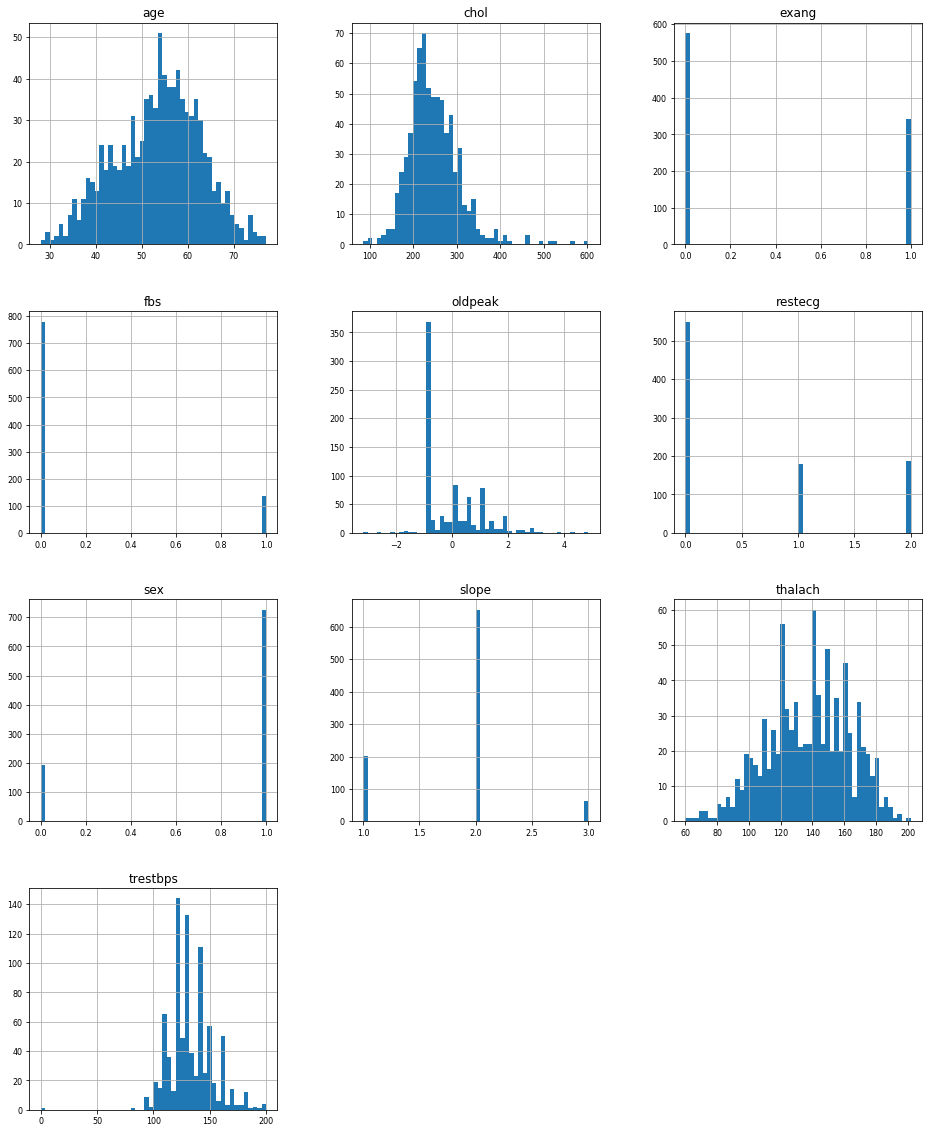

In [11]:
df_total.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

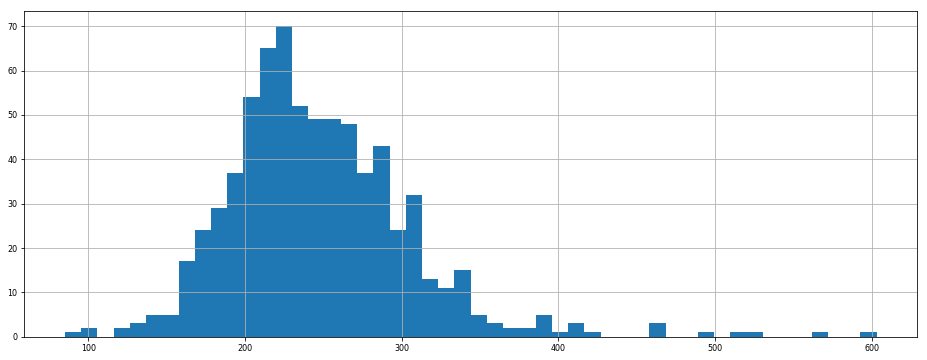

In [12]:
df_total['chol'].hist(figsize=(16, 6), bins=50, xlabelsize=8, ylabelsize=8);

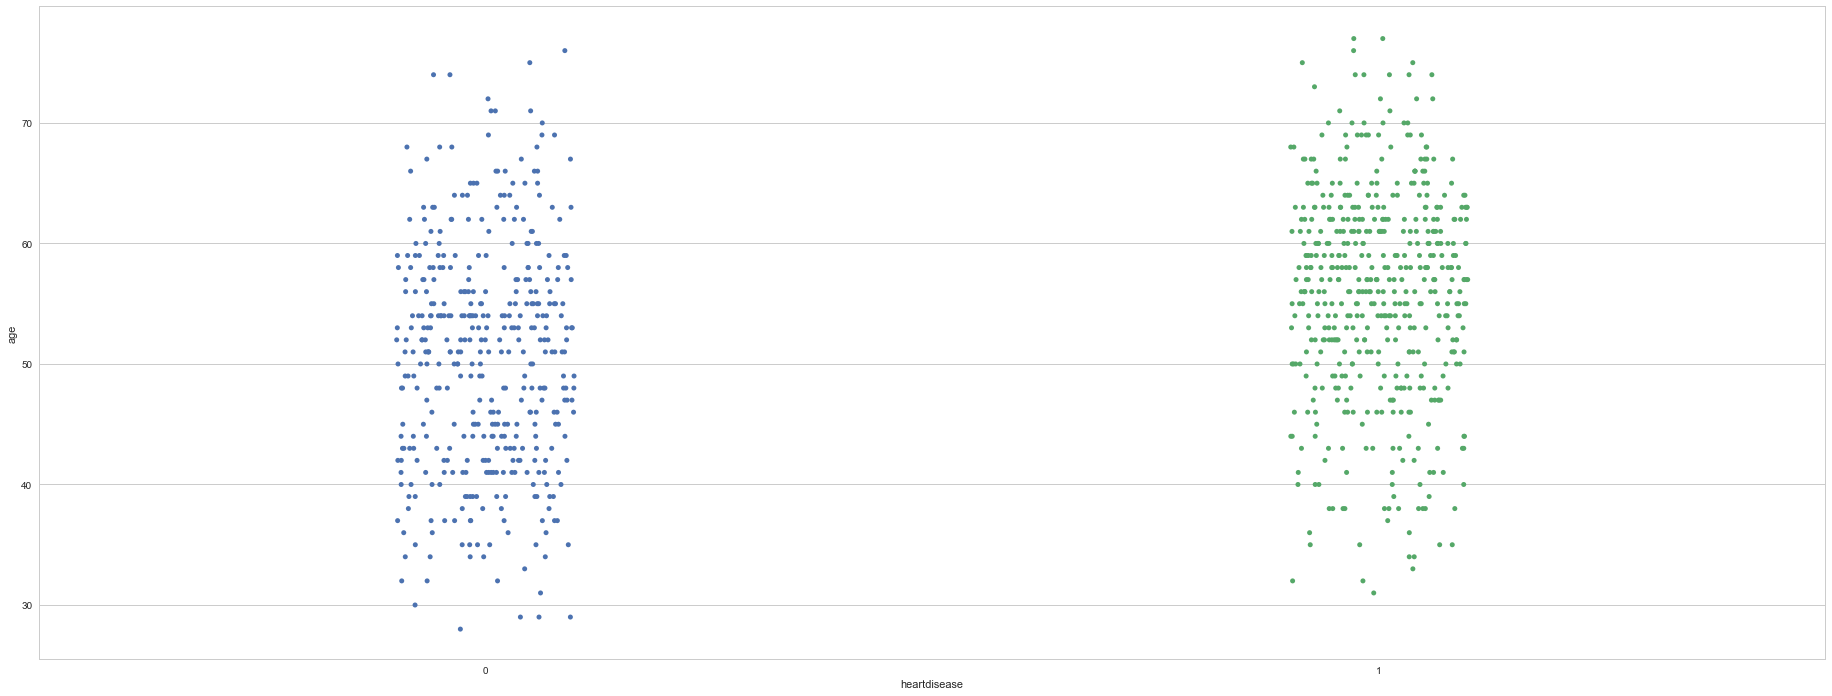

In [13]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(32,12))
sns.stripplot(y="age", x="heartdisease", data=df_total,jitter=True);


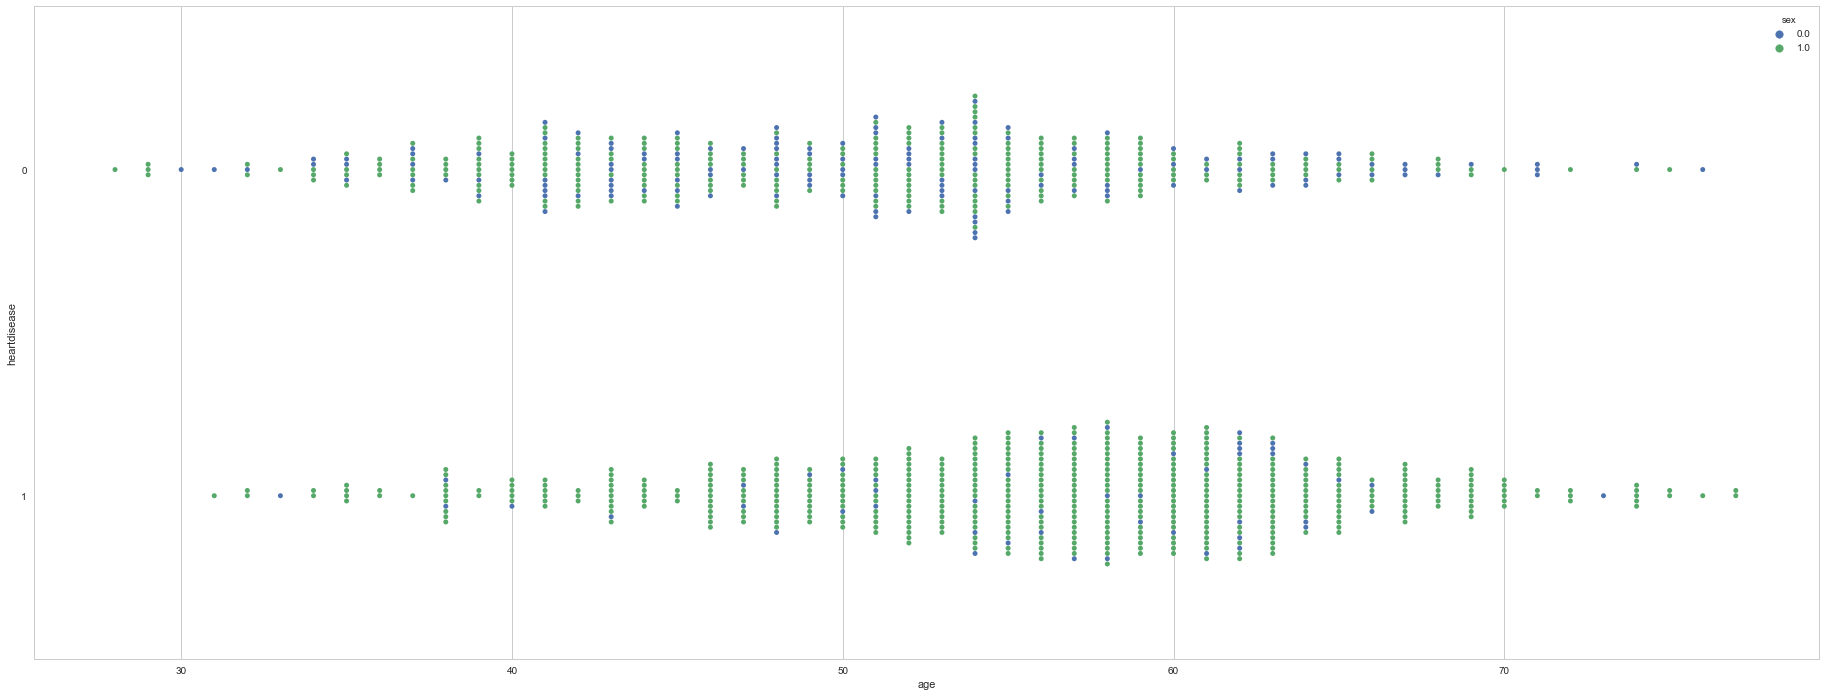

In [14]:
plt.figure(figsize=(32,12))
sns.swarmplot(x="age", y="heartdisease", hue = 'sex', data=df_total);



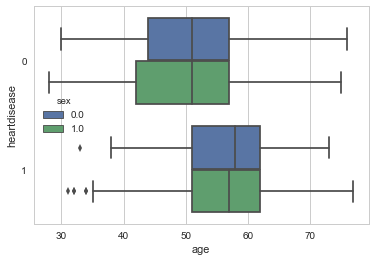

In [15]:
sns.boxplot(x="age", y="heartdisease", hue = 'sex', data=df_total);

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


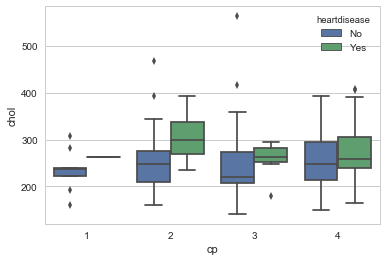

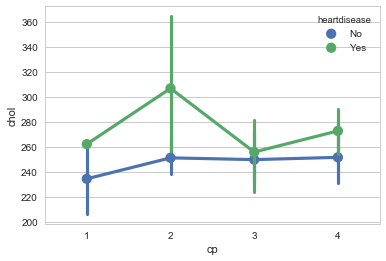

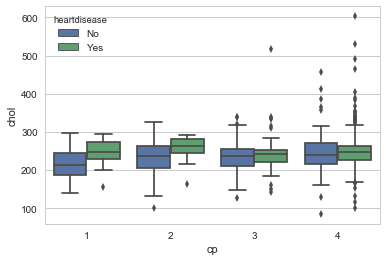

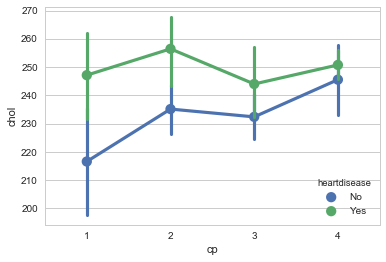

In [49]:
#sns.boxplot(y="age", x="cp", data=df_total, hue='sex');
df_total['sex'].replace([0,1],['Female','Male'],inplace=True)
df_total['heartdisease'].replace([0,1],['No','Yes'],inplace=True)
df_male = df_total[df_total['sex']=='Male']
df_female = df_total[df_total['sex']=='Female']
'''
plt.figure(figsize=(32,12))
sns.violinplot(y="chol", x="cp", data=df_male, hue='heartdisease',  inner="stick", palette="Set3", split=True);
plt.show()

plt.figure(figsize=(32,12))
sns.violinplot(y="chol", x="cp", data=df_female, hue='heartdisease',  inner="stick", palette="Set3", split=True);
plt.show()
'''
sns.boxplot(x="cp", y="chol", hue = 'heartdisease', data=df_female);
plt.show()

sns.pointplot(y="chol", x="cp", data=df_female, hue='heartdisease');
plt.show()

sns.boxplot(x="cp", y="chol", hue = 'heartdisease', data=df_male);
plt.show()

sns.pointplot(y="chol", x="cp", data=df_male, hue='heartdisease');
plt.show()

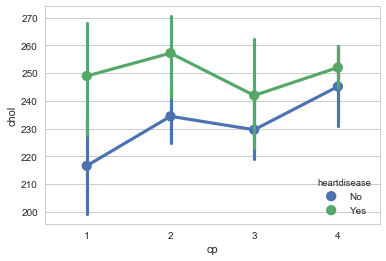

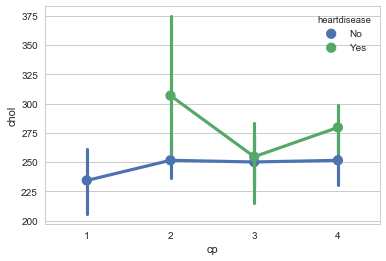

In [18]:
sns.pointplot(y="chol", x="cp", data=df_male, hue='heartdisease');
plt.show()

sns.pointplot(y="chol", x="cp", data=df_female, hue='heartdisease');
plt.show()

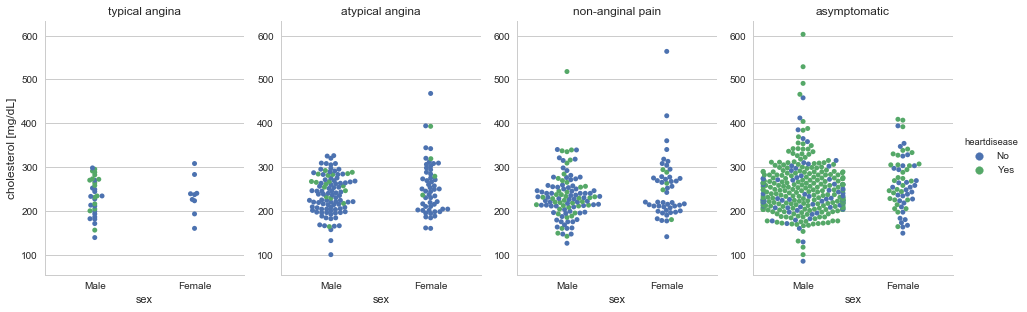

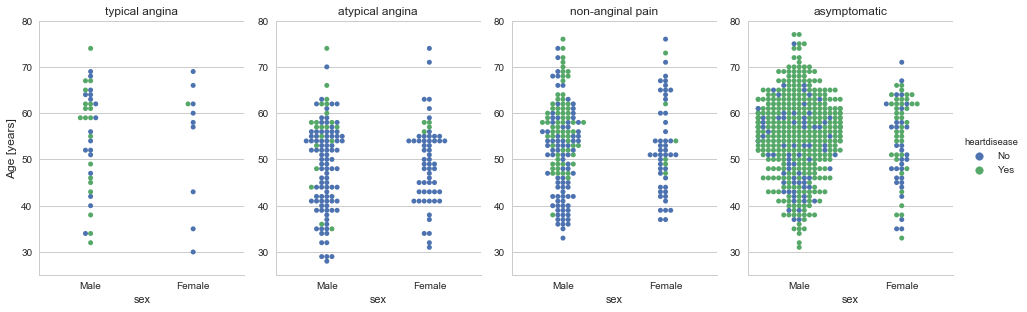

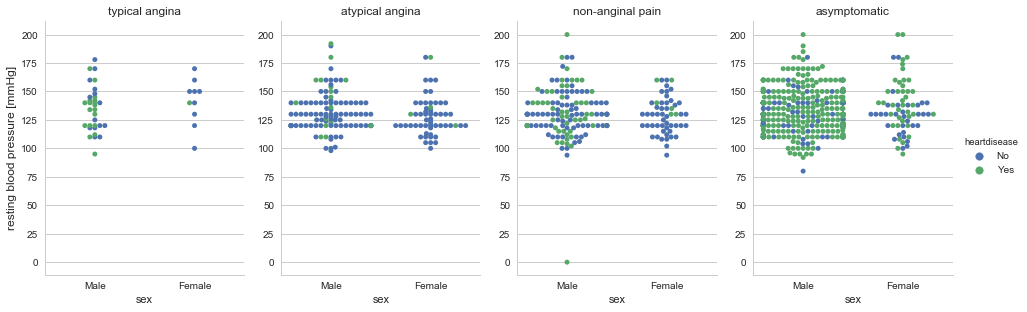

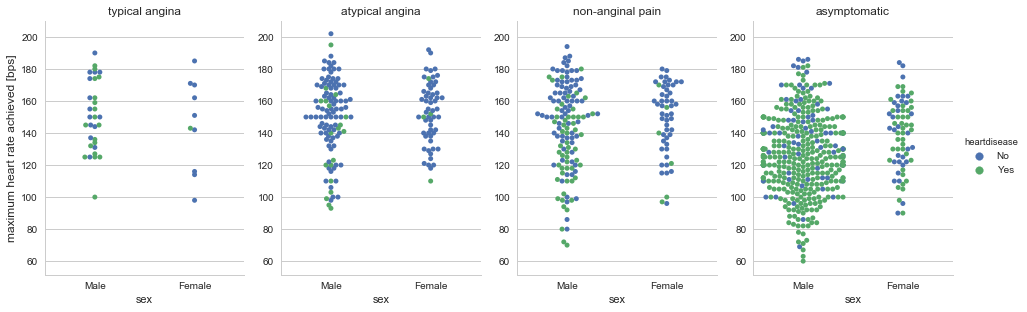

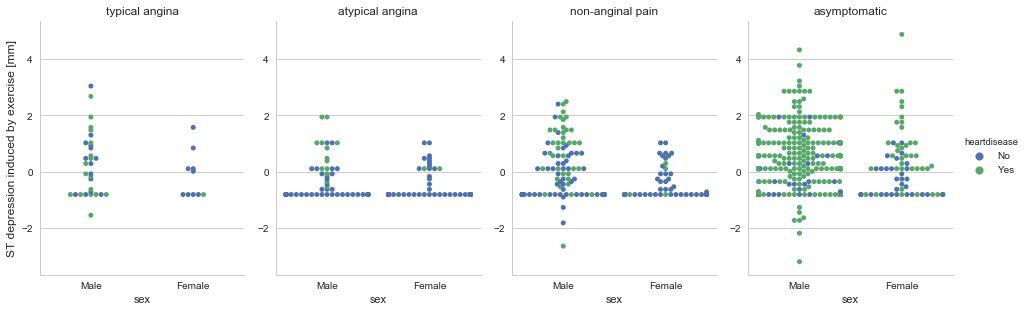

In [19]:
plt.figure(figsize=(32,32))
g = sns.factorplot(y="chol", x="sex", data=df_total, hue='heartdisease',
               col="cp", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=12)

g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", x="sex", data=df_total, hue='heartdisease',
               col="cp", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=12)

g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", x="sex", data=df_total, hue='heartdisease',
               col="cp", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12)

g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", x="sex", data=df_total, hue='heartdisease',
               col="cp", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("maximum heart rate achieved [bps]", fontsize=12)

g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", x="sex", data=df_total, hue='heartdisease',
               col="cp", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("ST depression induced by exercise [mm]", fontsize=12)

g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()



#pd.crosstab([df_total.sex], [df_total.heartdisease],margins=True).style.background_gradient(cmap='summer_r')
#g = sns.FacetGrid(df_total, row= 'slope', col='sex', hue = 'heartdisease', size=4, aspect=1.25, hue_kws = {'color': ['g', 'r']})
#g = g.map(sns.distplot, "age", hist=False, rug=True);


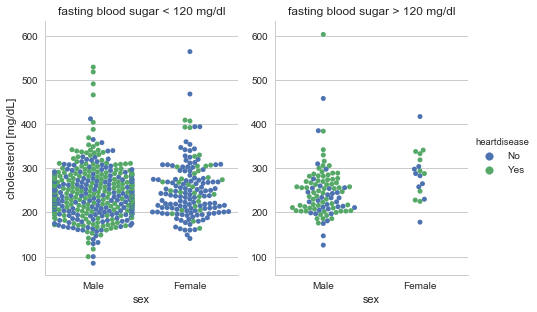

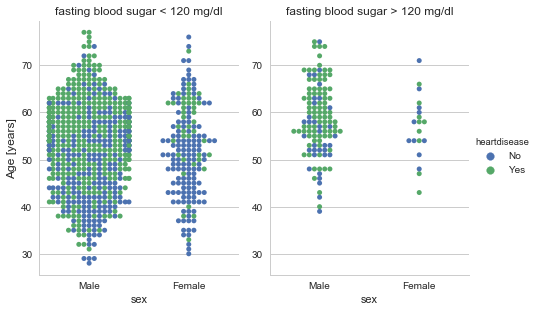

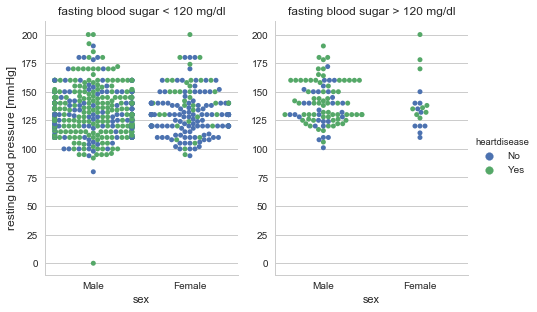

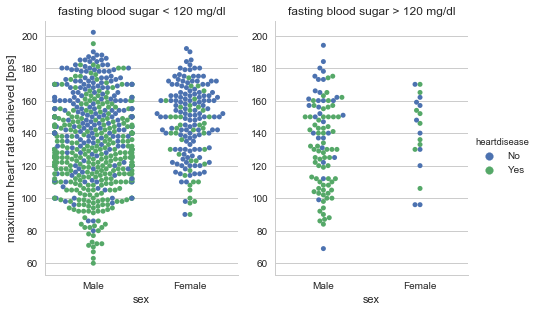

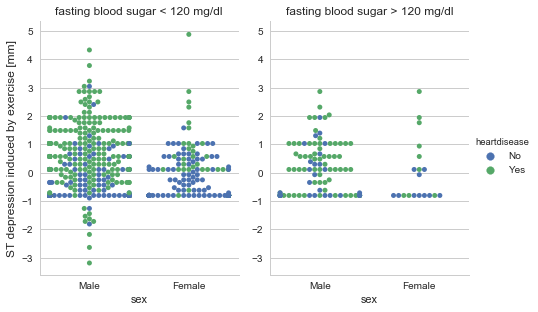

In [22]:
plt.figure(figsize=(32,32))
g = sns.factorplot(y="chol", x="sex", data=df_total, hue='heartdisease',
               col="fbs", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=12)


g.fig.get_axes()[0].set_title('fasting blood sugar < 120 mg/dl',  fontsize=12)
g.fig.get_axes()[1].set_title('fasting blood sugar > 120 mg/dl' ,  fontsize=12)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", x="sex", data=df_total, hue='heartdisease',
               col="fbs", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=12)


g.fig.get_axes()[0].set_title('fasting blood sugar < 120 mg/dl',  fontsize=12)
g.fig.get_axes()[1].set_title('fasting blood sugar > 120 mg/dl' ,  fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", x="sex", data=df_total, hue='heartdisease',
               col="fbs", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12)


g.fig.get_axes()[0].set_title('fasting blood sugar < 120 mg/dl',  fontsize=12)
g.fig.get_axes()[1].set_title('fasting blood sugar > 120 mg/dl' ,  fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", x="sex", data=df_total, hue='heartdisease',
               col="fbs", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("maximum heart rate achieved [bps]", fontsize=12)


g.fig.get_axes()[0].set_title('fasting blood sugar < 120 mg/dl',  fontsize=12)
g.fig.get_axes()[1].set_title('fasting blood sugar > 120 mg/dl' ,  fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", x="sex", data=df_total, hue='heartdisease',
               col="fbs", kind="swarm", size=4.5, aspect=0.75);
g.fig.get_axes()[0].set_ylabel("ST depression induced by exercise [mm]", fontsize=12)


g.fig.get_axes()[0].set_title('fasting blood sugar < 120 mg/dl',  fontsize=12)
g.fig.get_axes()[1].set_title('fasting blood sugar > 120 mg/dl' ,  fontsize=12)
plt.show()



#pd.crosstab([df_total.sex], [df_total.heartdisease],margins=True).style.background_gradient(cmap='summer_r')
#g = sns.FacetGrid(df_total, row= 'slope', col='sex', hue = 'heartdisease', size=4, aspect=1.25, hue_kws = {'color': ['g', 'r']})
#g = g.map(sns.distplot, "age", hist=False, rug=True);



In [69]:
df_total = df_imputed
df_total['cp'].replace([1,2,3,4],['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic' ],inplace=True)
plt.figure(figsize=(32,48))
g = sns.factorplot(y="chol", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=12)

#g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
#g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
#g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
#g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("maximum heart rate achieved [bps]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("ST depression induced by exercise [mm]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()



#pd.crosstab([df_total.sex], [df_total.heartdisease],margins=True).style.background_gradient(cmap='summer_r')
#g = sns.FacetGrid(df_total, row= 'slope', col='sex', hue = 'heartdisease', size=4, aspect=1.25, hue_kws = {'color': ['g', 'r']})
#g = g.map(sns.distplot, "age", hist=False, rug=True);



SyntaxError: unexpected character after line continuation character (<ipython-input-69-0a0454faa16b>, line 63)

In [72]:
my_crosstab = pd.crosstab([df_total.cp], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')



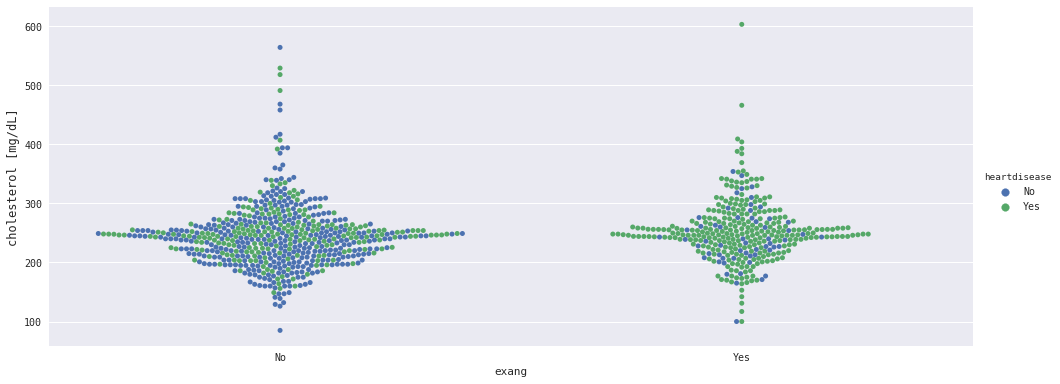

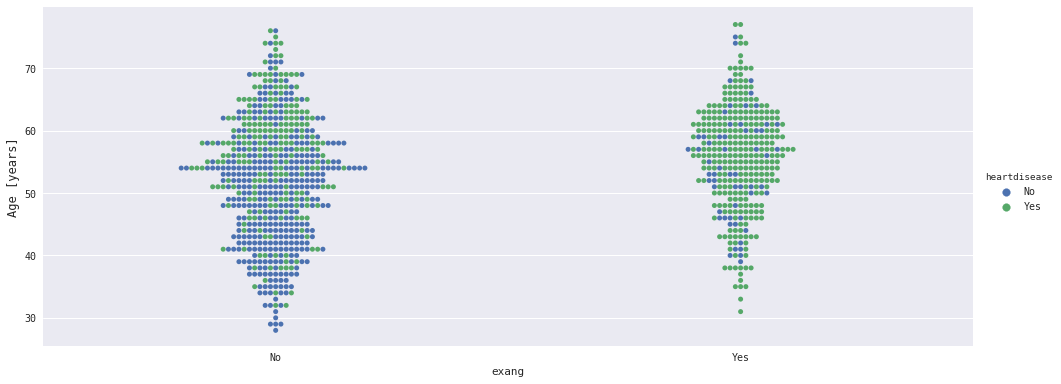

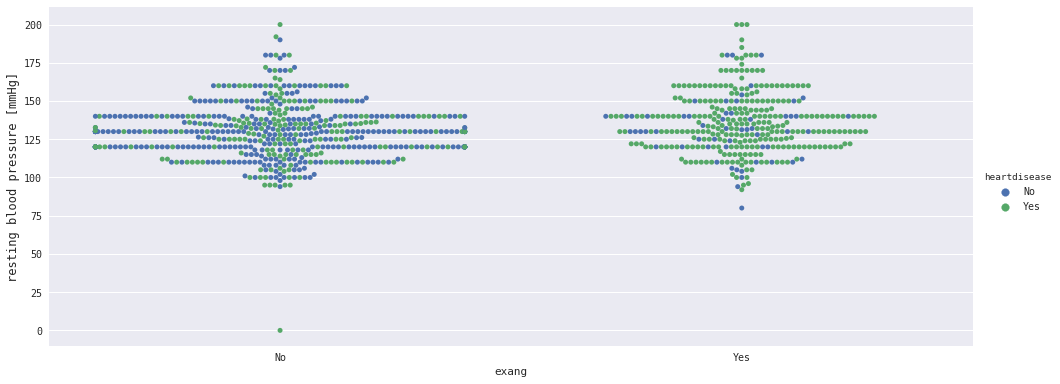

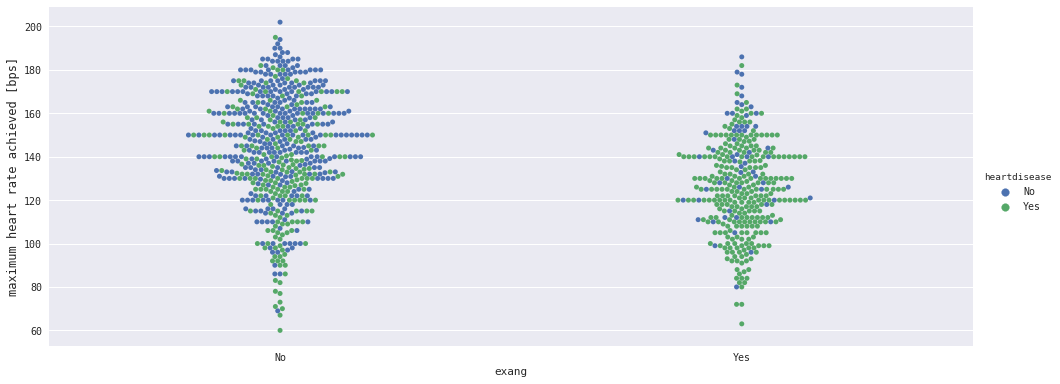

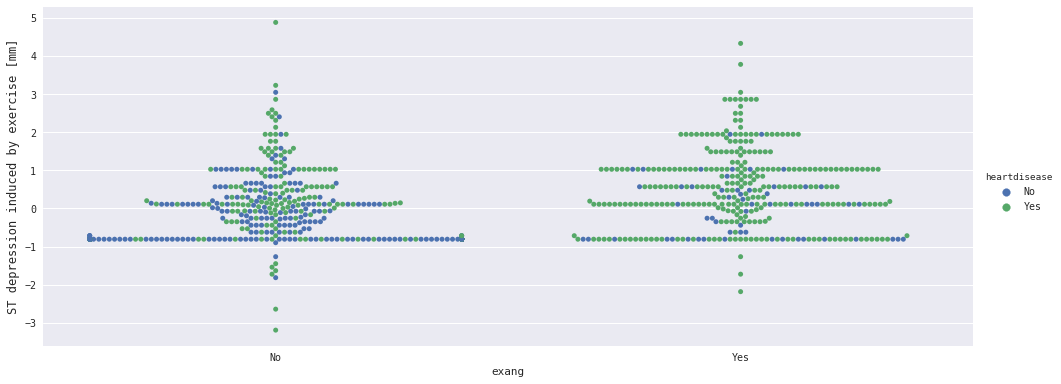

In [62]:
df_total = df_imputed
df_total['exang'].replace([0,1],['No','Yes'],inplace=True)
plt.figure(figsize=(32,48))
g = sns.factorplot(y="chol", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=12)

#g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
#g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
#g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
#g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("maximum heart rate achieved [bps]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=5.5, aspect=2.5);
g.fig.get_axes()[0].set_ylabel("ST depression induced by exercise [mm]", fontsize=12)
'''
g.fig.get_axes()[0].set_title('typical angina',  fontsize=12)
g.fig.get_axes()[1].set_title('atypical angina' ,  fontsize=12)
g.fig.get_axes()[2].set_title('non-anginal pain', fontsize=12)
g.fig.get_axes()[3].set_title('asymptomatic', fontsize=12)
'''
plt.show()

pd.crosstab([df_total.exang], [df_total.heartdisease],margins=True).style.background_gradient(cmap='summer_r')

#pd.crosstab([df_total.sex], [df_total.heartdisease],margins=True).style.background_gradient(cmap='summer_r')
#g = sns.FacetGrid(df_total, row= 'slope', col='sex', hue = 'heartdisease', size=4, aspect=1.25, hue_kws = {'color': ['g', 'r']})
#g = g.map(sns.distplot, "age", hist=False, rug=True);







ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


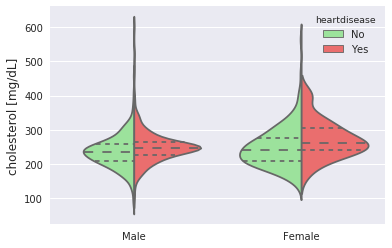

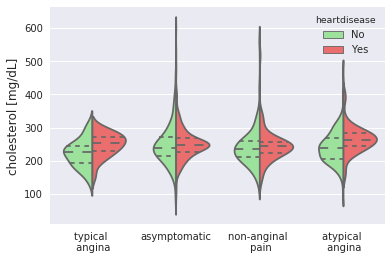

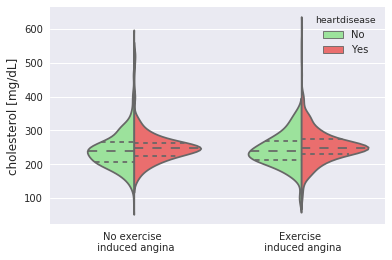

In [8]:
df_total = df_imputed

df_total['heartdisease'].replace([0,1],['No','Yes'],inplace=True)
df_total['sex'].replace([0,1],['Female','Male'],inplace=True)
df_total['exang'].replace([0,1],['No exercise \n induced angina', 'Exercise \n induced angina'],inplace=True)
df_total['cp'].replace([1,2,3,4],['typical \n angina', 'atypical \n angina', 'non-anginal \n pain','asymptomatic'],inplace=True)


sns.set()
plt.figure()
#----------------------------------
g = sns.violinplot(y="chol", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("cholesterol [mg/dL]", fontsize=12)
g.set_xlabel("", fontsize=12)
#labels_xtick = ['Female', 'Male']
#g.set_xticklabels(labels_xtick, fontsize=12)
plt.show()
#----------------------------------

g = sns.violinplot(y="chol", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("cholesterol [mg/dL]", fontsize=12)
#labels_xtick = ['typical \n angina', 'atypical \n angina', 'non-anginal \n pain','asymptomatic']
g.set_xlabel("", fontsize=12)
#g.set_xticklabels(labels_xtick, fontsize=12)
#g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="chol", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("cholesterol [mg/dL]", fontsize=12)
#labels_xtick = ['No exercise \n induced angina', 'Exercise \n induced angina']
g.set_xlabel("", fontsize=12)

plt.show()

#----------------------------------








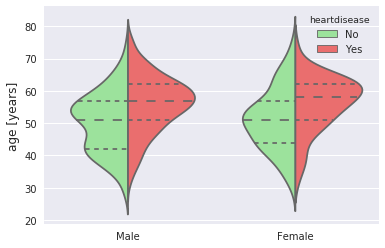

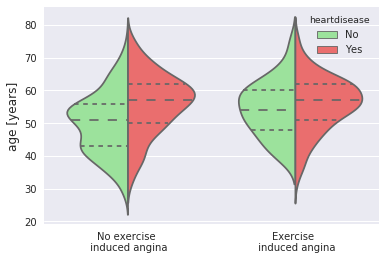

In [25]:
plt.figure()
#----------------------------------
g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------

g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()

#----------------------------------



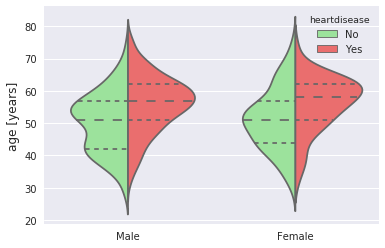

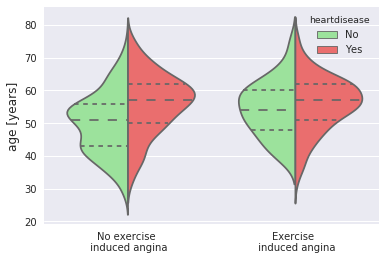

In [26]:
df_total['heartdisease'].replace([0,1],['No','Yes'],inplace=True)
plt.figure()
#----------------------------------
g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)

plt.show()
#----------------------------------

g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="age", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("age [years]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()

#----------------------------------

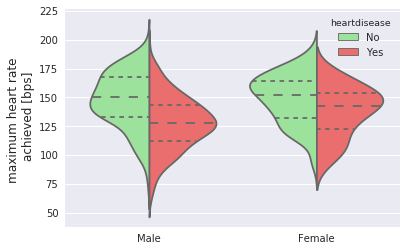

In [27]:
df_total['heartdisease'].replace([0,1],['No','Yes'],inplace=True)
plt.figure()
#----------------------------------
g = sns.violinplot(y="thalach", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("maximum heart rate \n achieved [bps]", fontsize=12)

g.set_xlabel("", fontsize=12)

plt.show()
#----------------------------------

g = sns.violinplot(y="thalach", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("maximum heart rate \n achieved [bps]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="thalach", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("maximum heart rate \n achieved [bps]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()

#----------------------------------

In [28]:
df_total['heartdisease'].replace([0,1],['No','Yes'],inplace=True)
plt.figure()
#----------------------------------
g = sns.violinplot(y="trestbps", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("resting \n blood pressure [mmHg]", fontsize=12)

g.set_xlabel("", fontsize=12)

plt.show()
#----------------------------------

g = sns.violinplot(y="trestbps", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("resting \n blood pressure [mmHg]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="trestbps", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("resting \n blood pressure [mmHg]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()

#----------------------------------

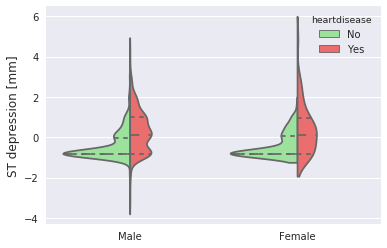

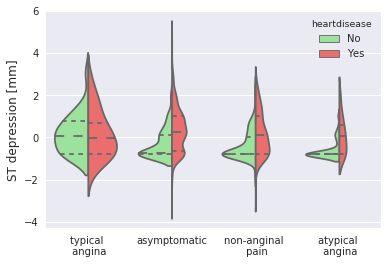

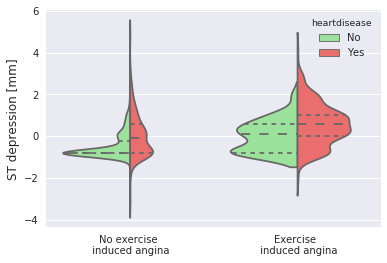

In [29]:
plt.figure()
#----------------------------------
g = sns.violinplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="sex", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("ST depression [mm]", fontsize=12)

g.set_xlabel("", fontsize=12)

plt.show()
#----------------------------------

g = sns.violinplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="cp", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"]);
g.set_ylabel("ST depression [mm]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()
#----------------------------------
g = sns.violinplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="exang", size=5.5, aspect=2.5, split=True, inner="quartile",
                   palette=["lightgreen", "#FF5959"])
g.set_ylabel("ST depression [mm]", fontsize=12)

g.set_xlabel("", fontsize=12)
plt.show()

#----------------------------------

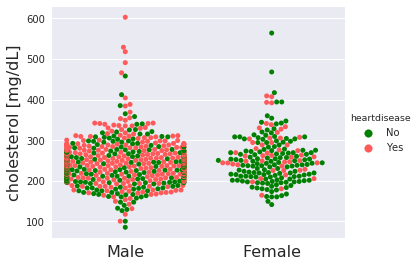

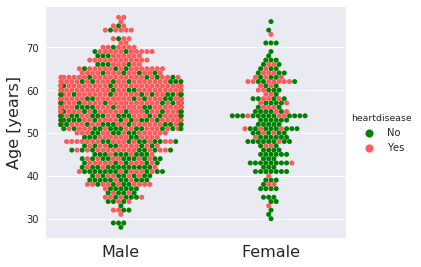

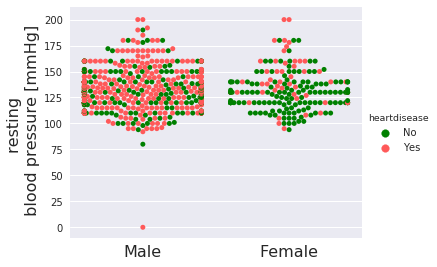

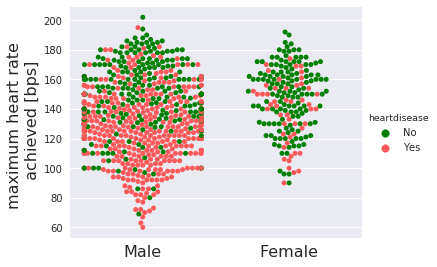

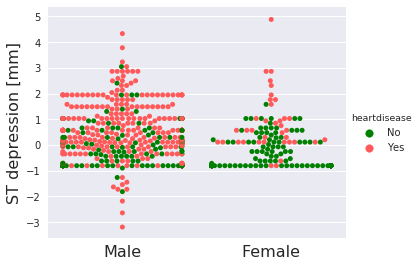

In [27]:



plt.figure(figsize=(50,48))
g = sns.factorplot(y="chol", data=df_total, hue='heartdisease',
               x="sex", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=16)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)
plt.show()

plt.figure(figsize=(50,48))
g = sns.factorplot(y="age", data=df_total, hue='heartdisease',
               x="sex", kind="swarm",  size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=16)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()

plt.figure(figsize=(50,48))
g = sns.factorplot(y="trestbps", data=df_total, hue='heartdisease',
               x="sex", kind="swarm",  size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("resting \n blood pressure [mmHg]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=16)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()

plt.figure(figsize=(50,48))
g = sns.factorplot(y="thalach", data=df_total, hue='heartdisease',
               x="sex", kind="swarm",  size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("maximum heart rate \n achieved [bps]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=16)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)
plt.show()

plt.figure(figsize=(50,48))
g = sns.factorplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="sex", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("ST depression [mm]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=16)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()





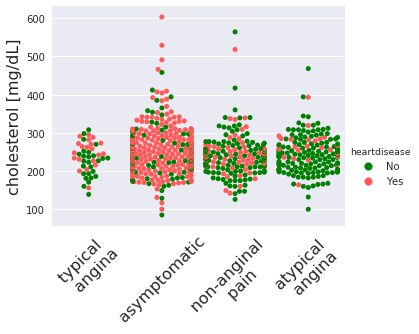

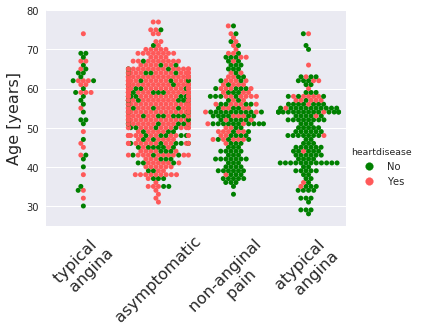

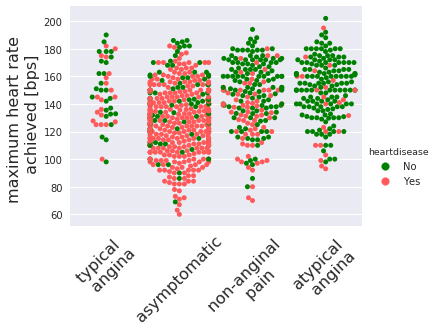

In [9]:
sns.set()

plt.figure(figsize=(32,48))
#df_total['cp'].replace([1,2,3,4],['typical \n angina', 'atypical \n angina', 'non-anginal \n pain','asymptomatic'],inplace=True)

g = sns.factorplot(y="chol", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=16)

locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16, rotation=45)
g.fig.get_axes()[0].set_xlabel("", fontsize=16, rotation=90)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12, rotation=90)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16, rotation=45)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("resting \n blood pressure [mmHg]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16, rotation=45)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", data=df_total, hue='heartdisease',
               x="cp", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("maximum heart rate \n achieved [bps]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16, rotation=45)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="cp", kind="swarm",size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("ST depression [mm]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16, rotation=45)

plt.show()






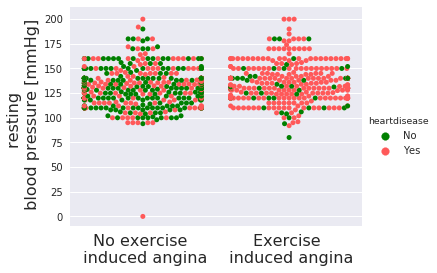

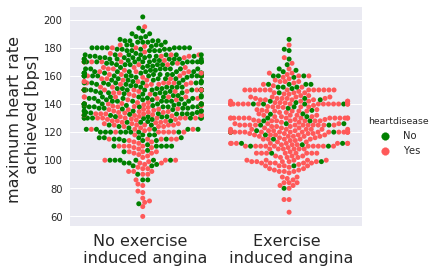

In [10]:
plt.figure(figsize=(32,48))
df_total['exang'].replace([0,1],['No exercise \n induced angina', 'Exercise \n induced angina'],inplace=True)
g = sns.factorplot(y="chol", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("cholesterol [mg/dL]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)
plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="age", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("Age [years]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="trestbps", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("resting \n blood pressure [mmHg]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="thalach", data=df_total, hue='heartdisease',
               x="exang", kind="swarm", size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("maximum heart rate \n achieved [bps]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()

plt.figure(figsize=(32,32))
g = sns.factorplot(y="oldpeak", data=df_total, hue='heartdisease',
               x="exang", kind="swarm",size=4, aspect=1.25,palette=["green", "#FF5959"]);
g.fig.get_axes()[0].set_ylabel("ST depression [mm]", fontsize=16)
g.fig.get_axes()[0].set_xlabel("", fontsize=12)
locs, labs = plt.xticks() 
g.fig.get_axes()[0].set_xticklabels(labs, fontsize=16)

plt.show()







In [73]:
my_crosstab = pd.crosstab([df_total.exang], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')

In [74]:
my_crosstab = pd.crosstab([df_total.fbs], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')



In [5]:
my_crosstab = pd.crosstab([df_total.sex], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')

In [76]:
my_crosstab = pd.crosstab([df_total.restecg], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')



In [77]:
my_crosstab = pd.crosstab([df_total.slope], [df_total.heartdisease],normalize='all', margins=True).round(4)*100
my_crosstab.style.background_gradient(cmap='summer_r')

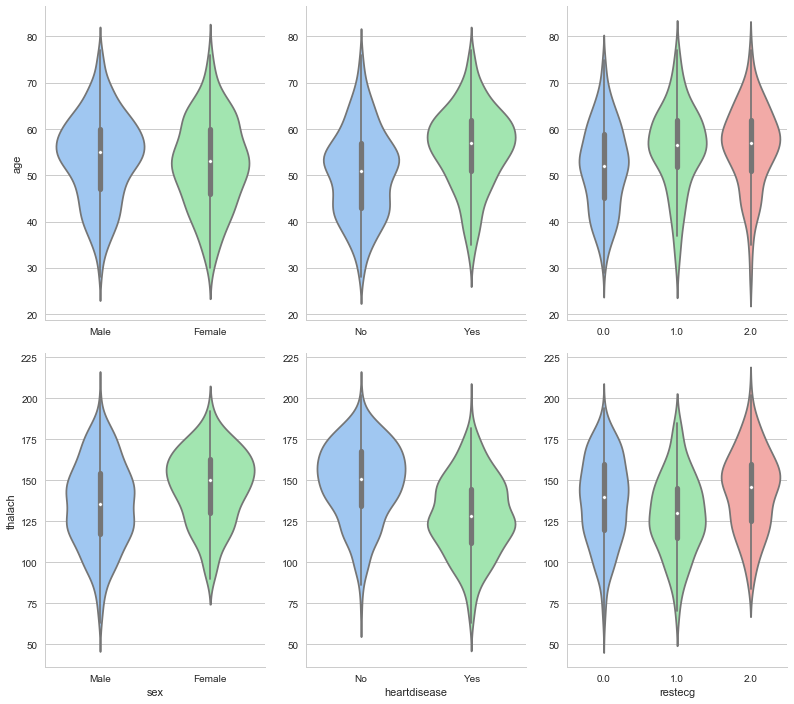

In [39]:
g = sns.PairGrid(df_total,
                 x_vars=["sex", "heartdisease", "restecg"],
                 y_vars=["age", "thalach"],
                 aspect=.75, size=5)
g.map(sns.violinplot, palette="pastel");




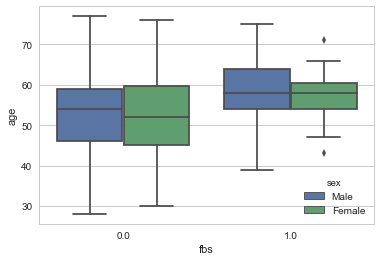

In [27]:
sns.boxplot(y="age", x="fbs", hue = 'sex', data=df_total);

In [26]:
sns.boxplot(y="age", x="restecg", hue = 'sex', data=df_total);

In [72]:
sns.boxplot(x="age", y="exang", hue = 'sex', data=df_total);

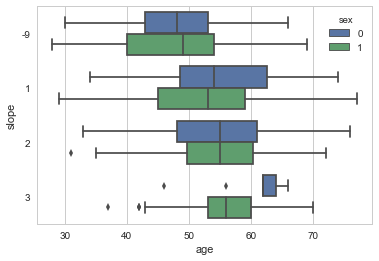

In [73]:
sns.boxplot(x="age", y="slope", hue = 'sex', data=df_total);

In [74]:
sns.boxplot(x="age", y="thal", hue = 'sex', data=df_total);

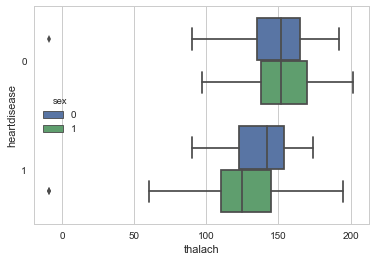

In [75]:
sns.boxplot(x="thalach", y="heartdisease", hue = 'sex', data=df_total);

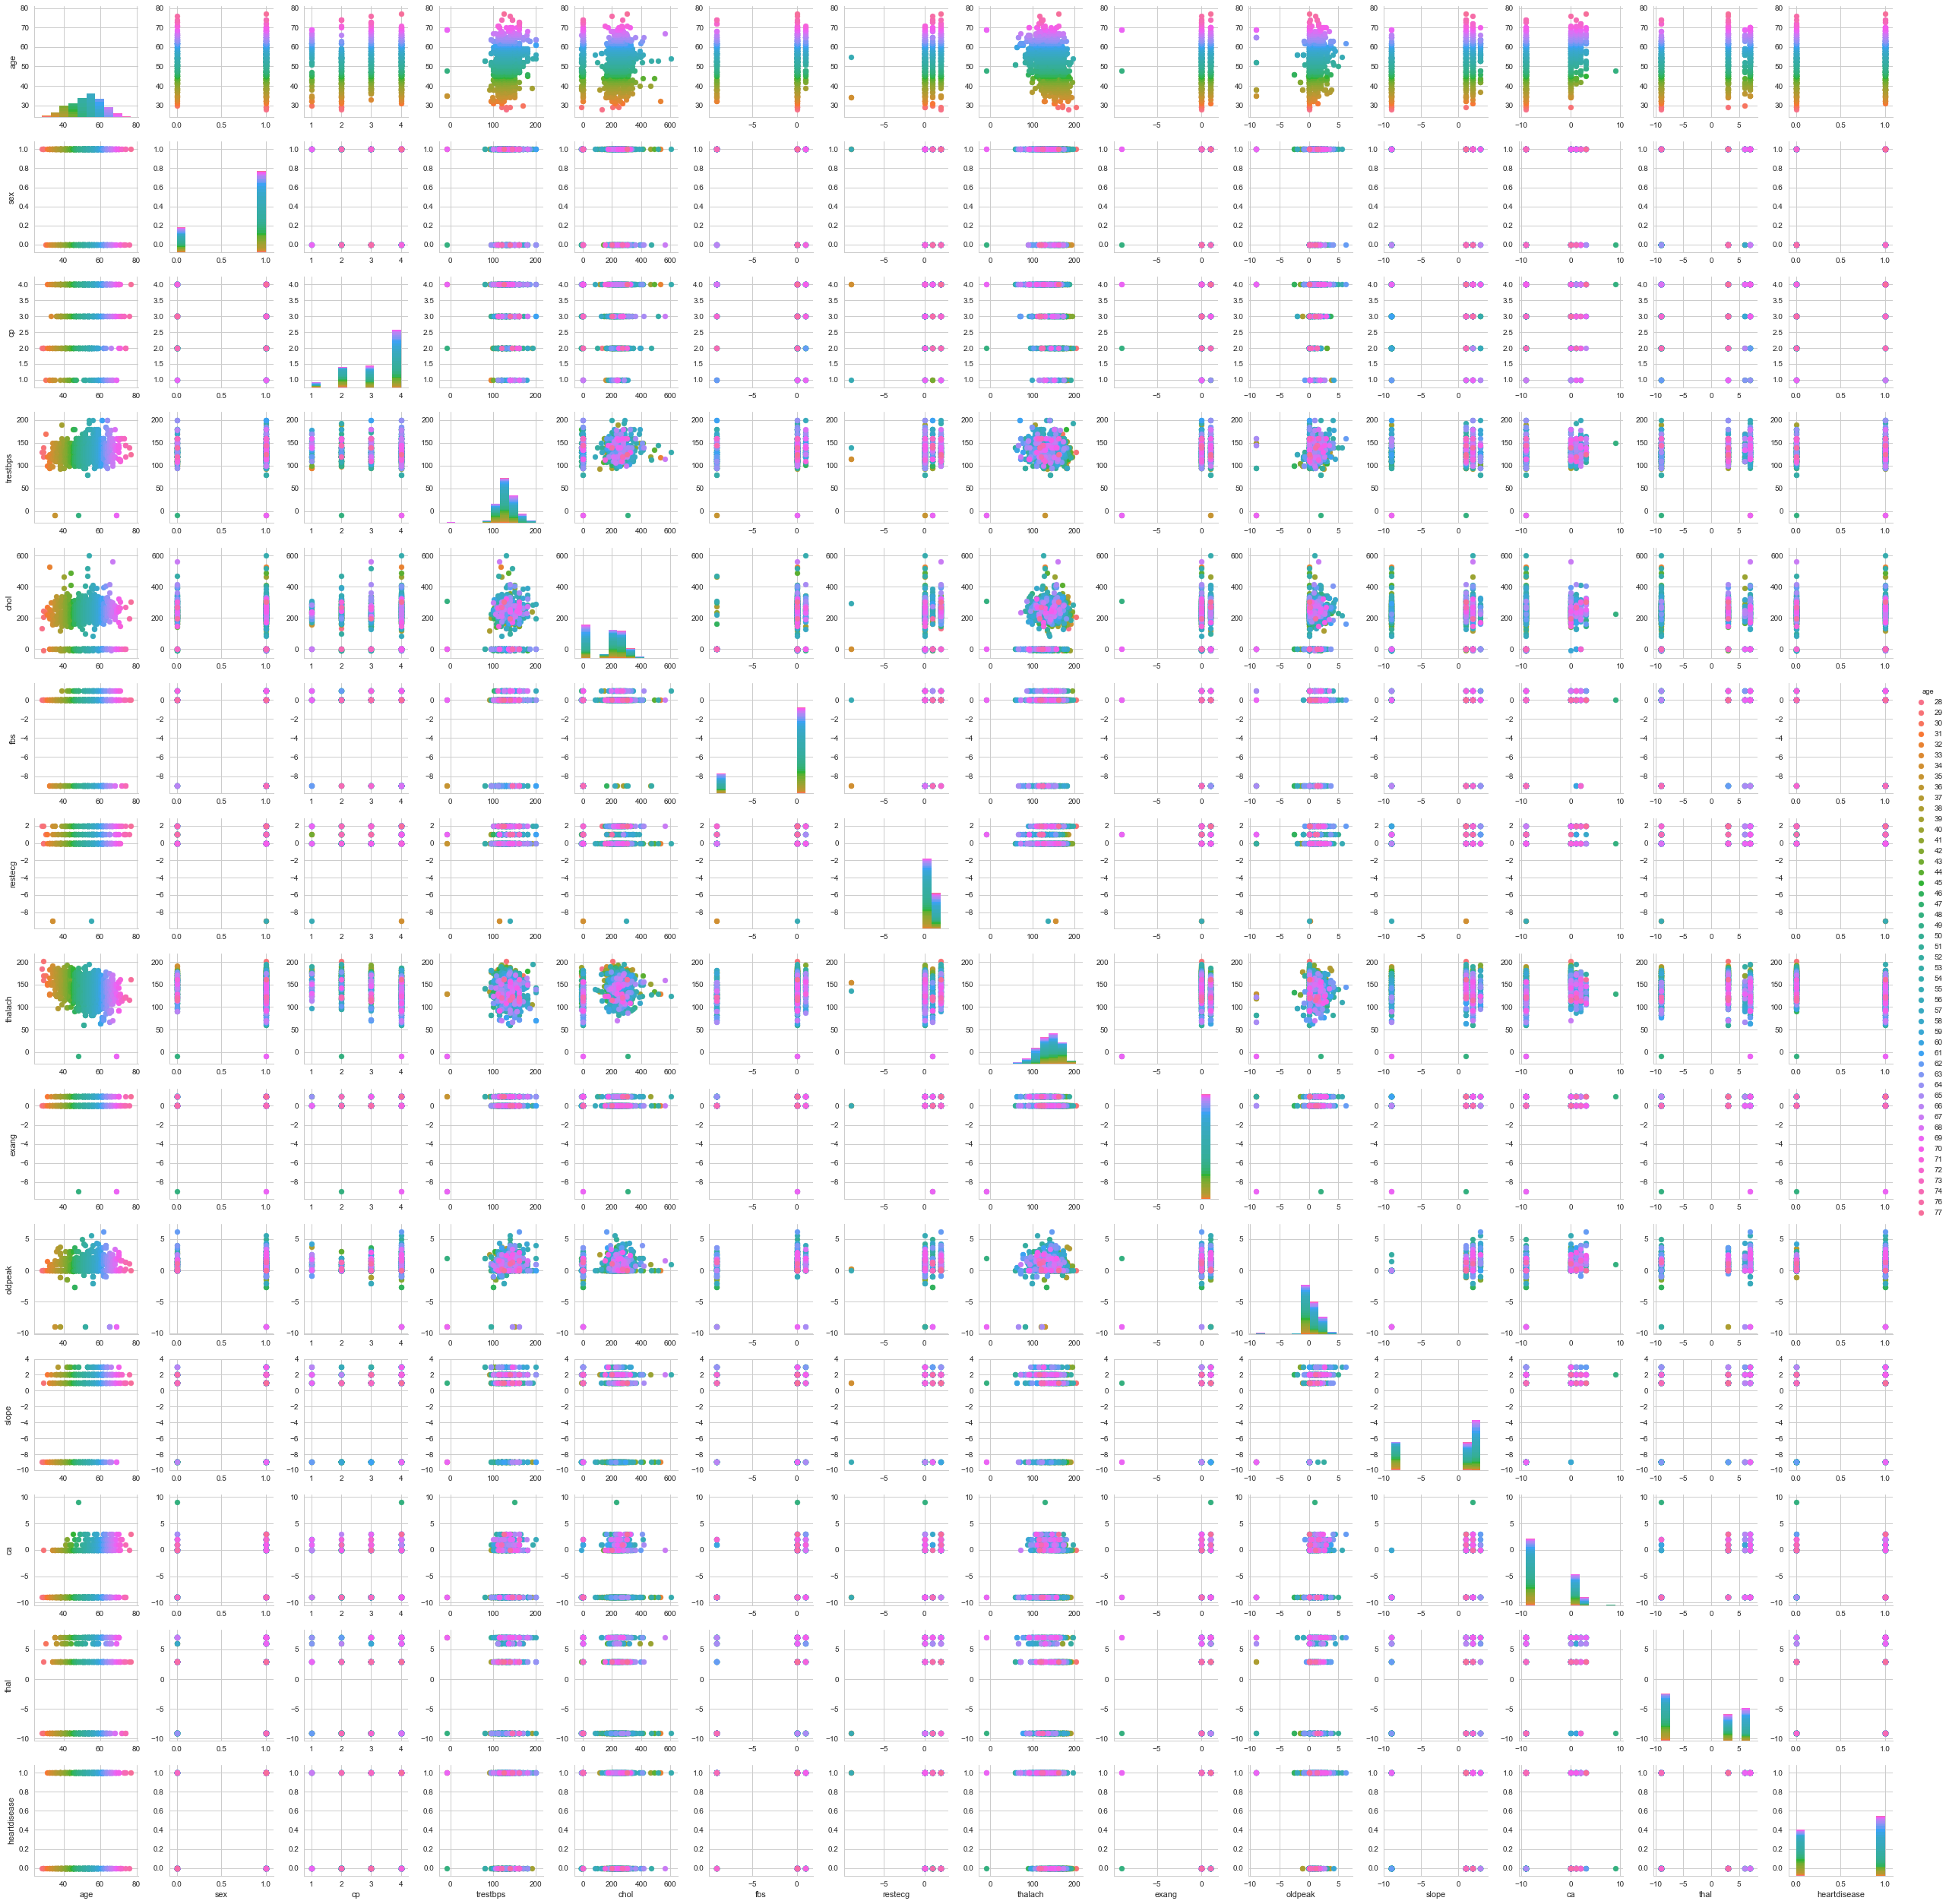

In [133]:
g = sns.PairGrid(df_total, hue="age")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();




In [134]:
g = sns.PairGrid(df_total, hue="heartdisease")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


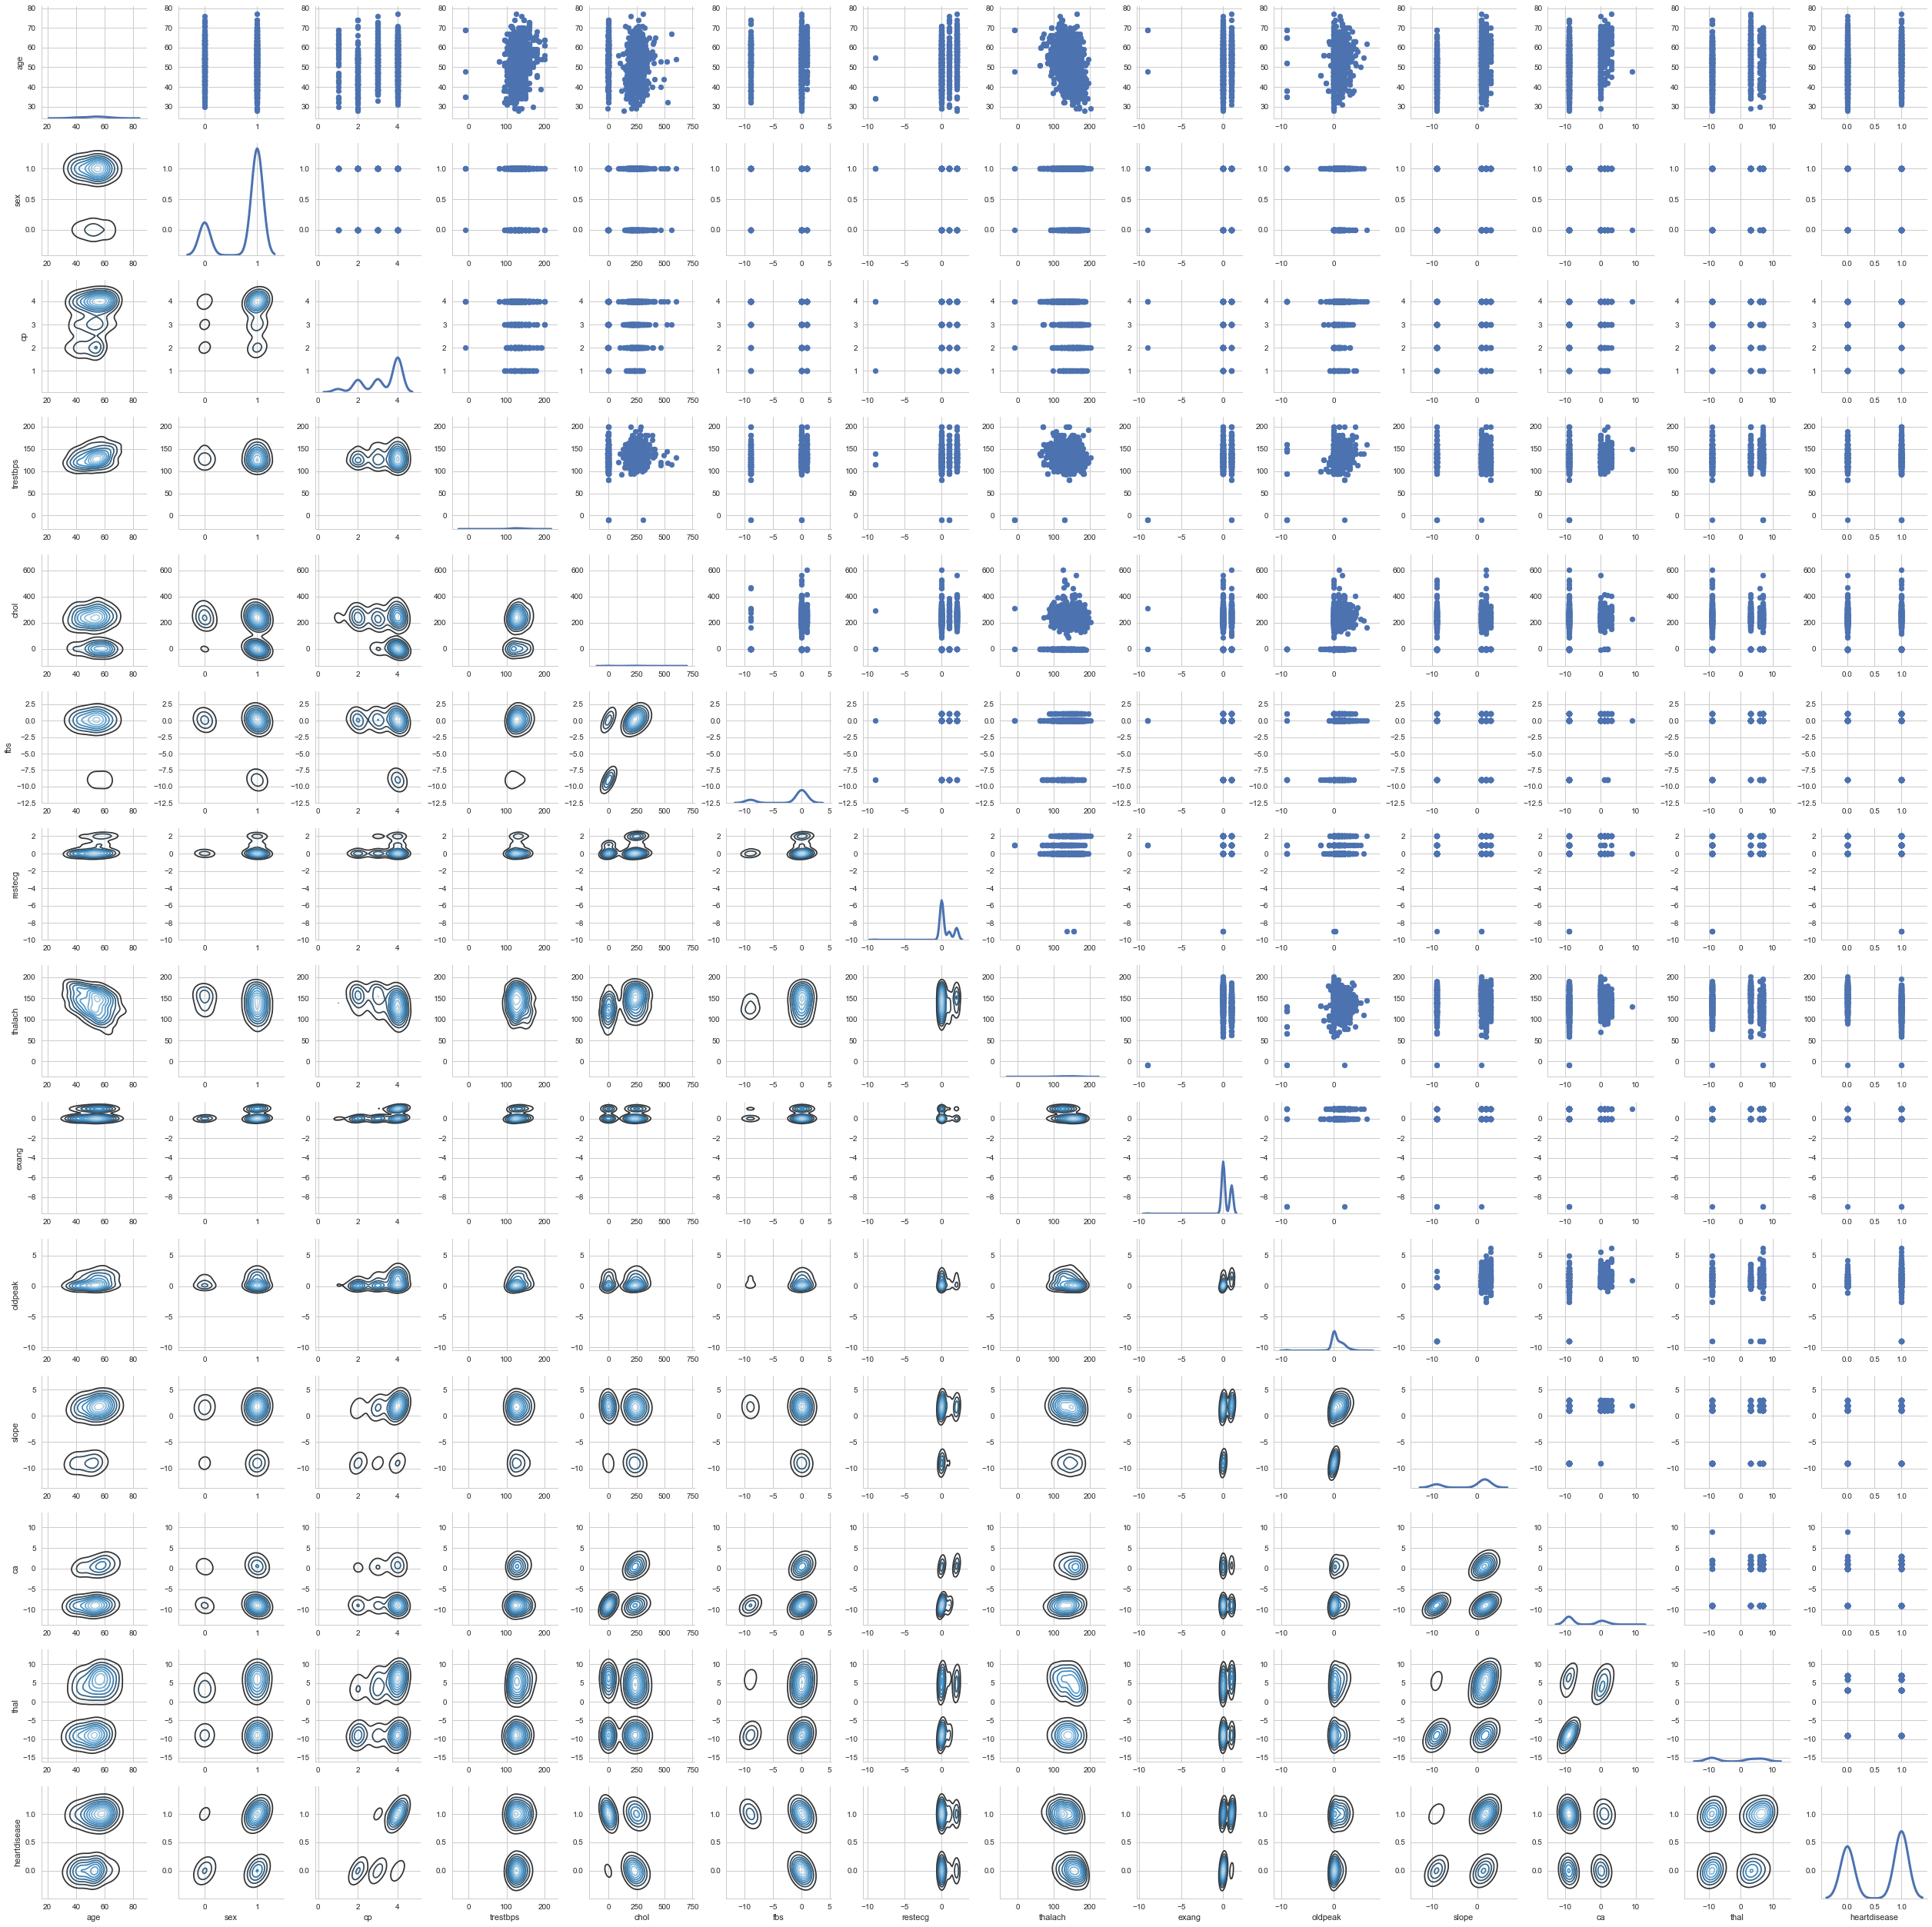

In [135]:
g = sns.PairGrid(df_total)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

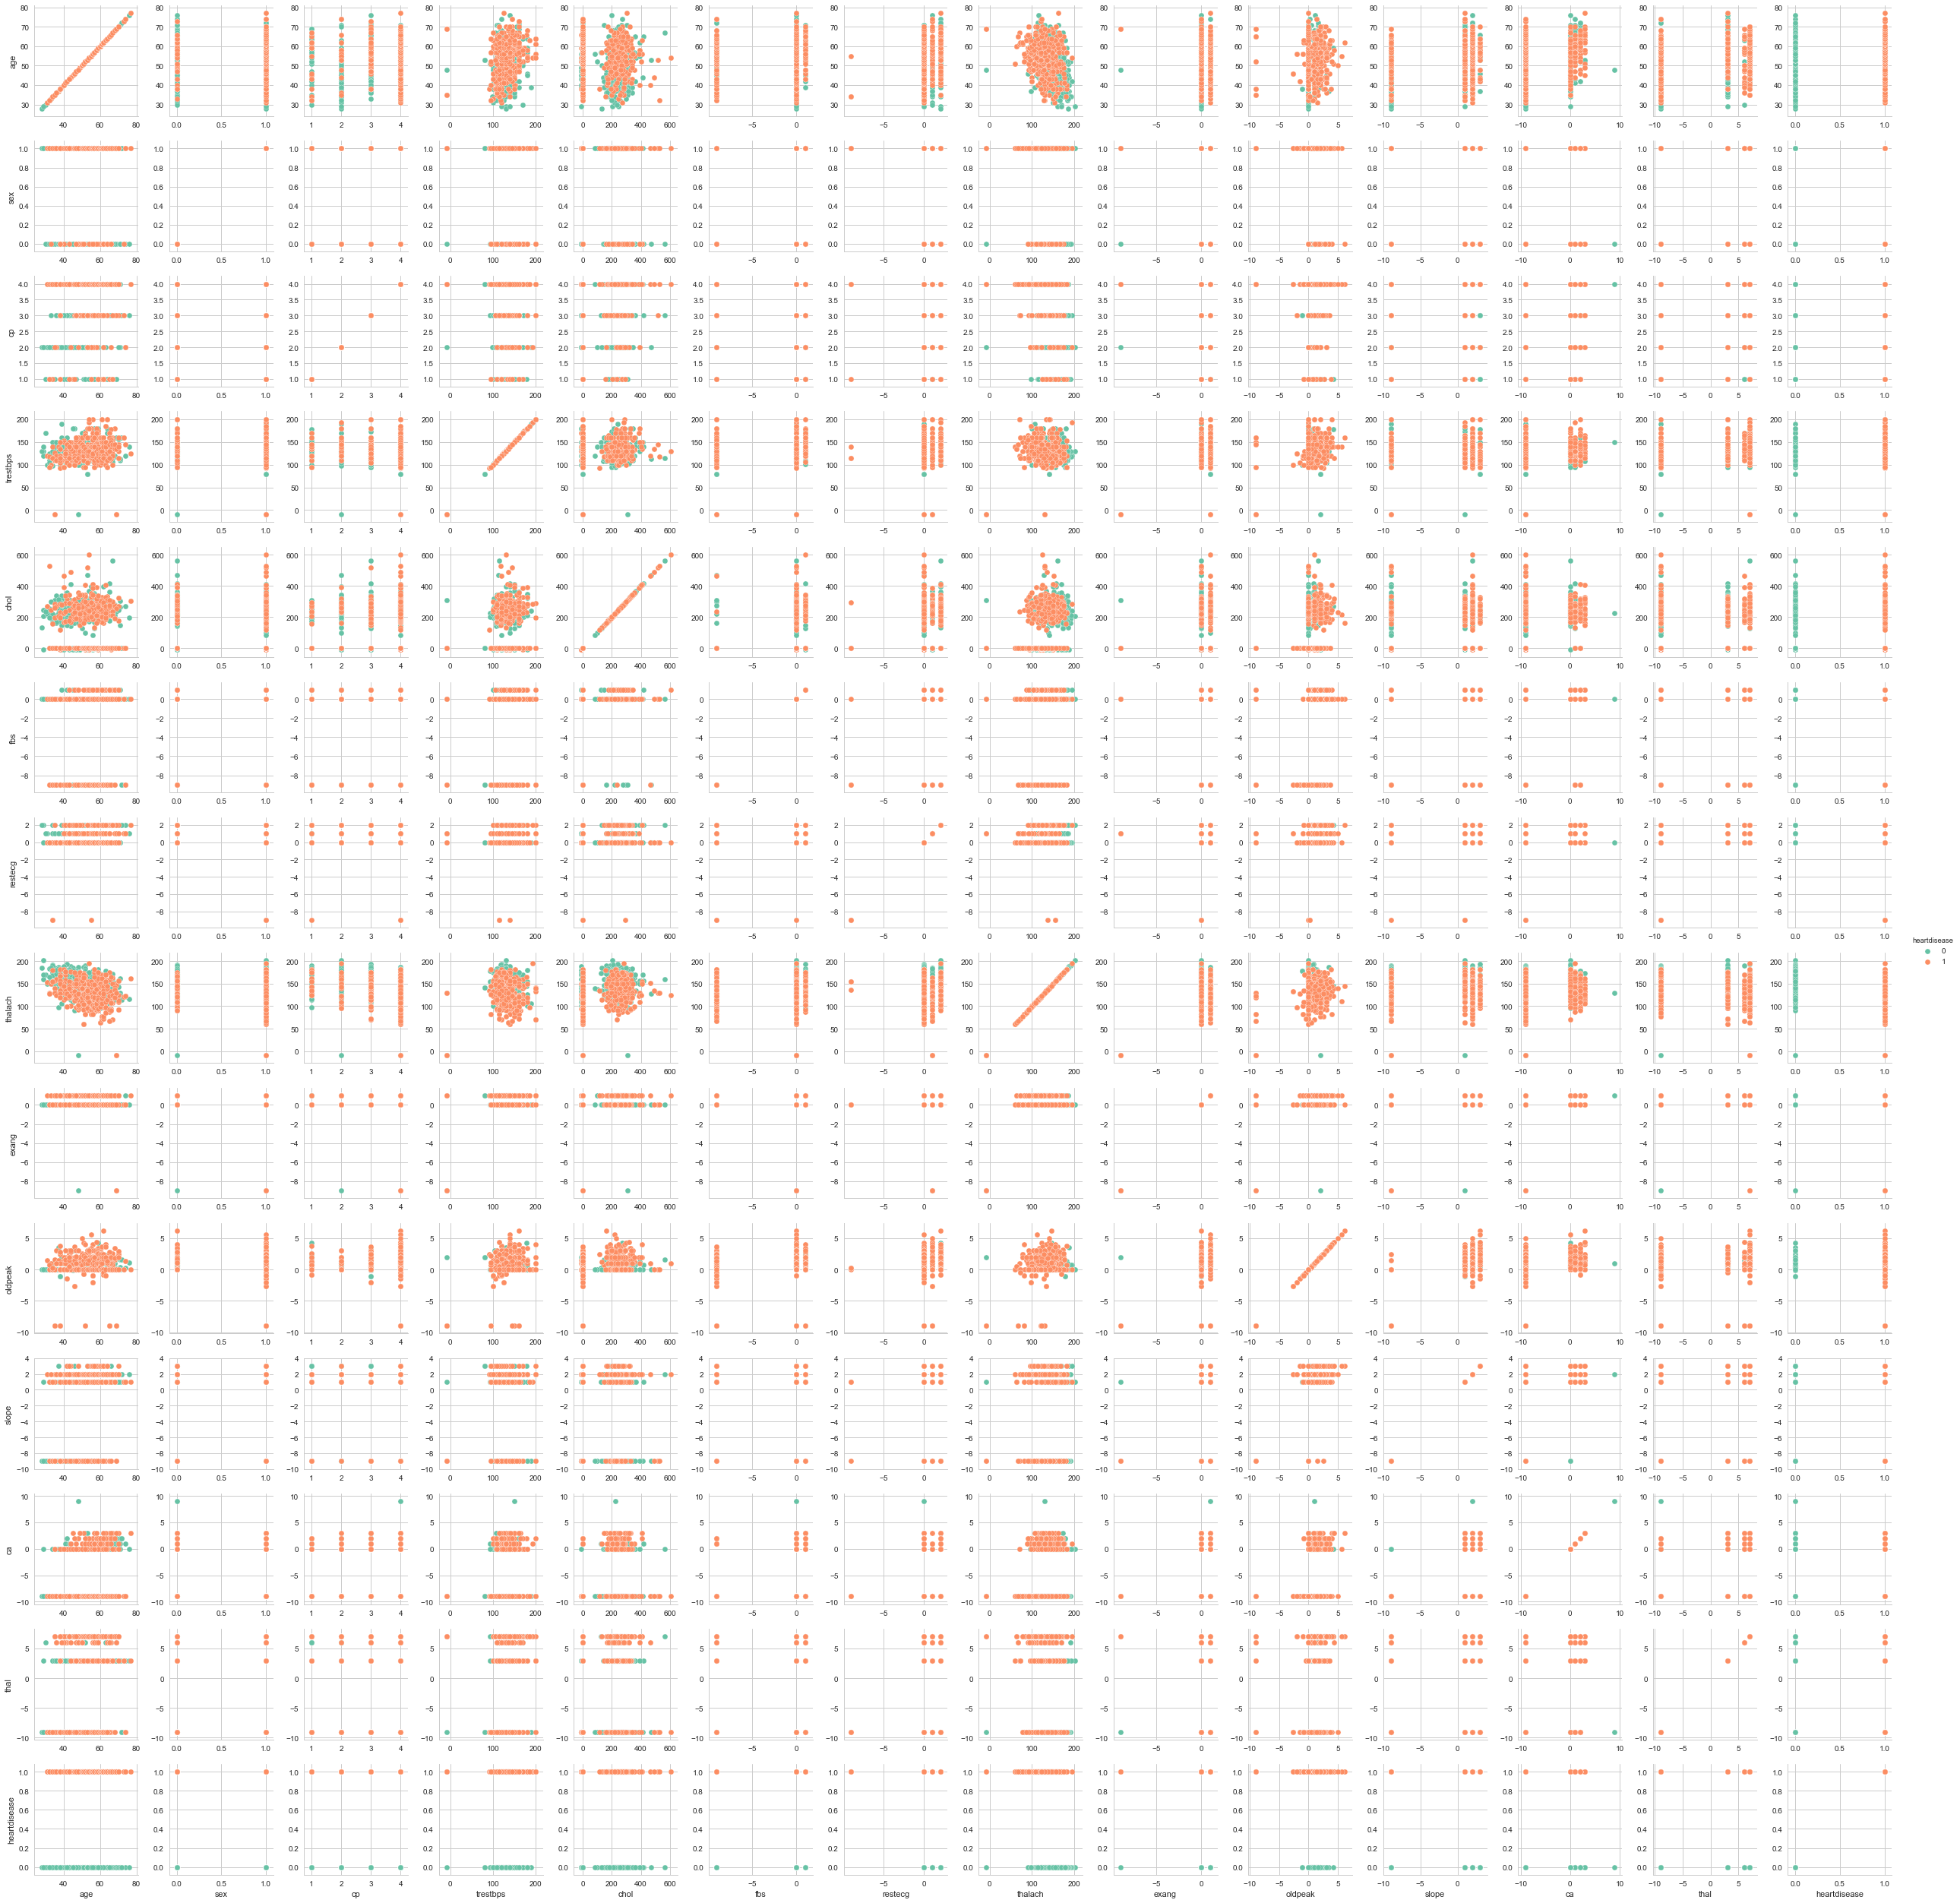

In [140]:
g = sns.PairGrid(df_total, hue="heartdisease", palette="Set2")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();




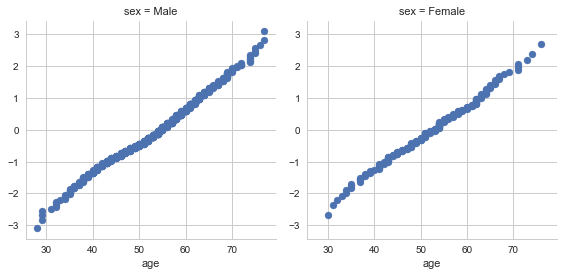

In [31]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(df_total, col="sex", size=4)
g.map(quantile_plot, "age");

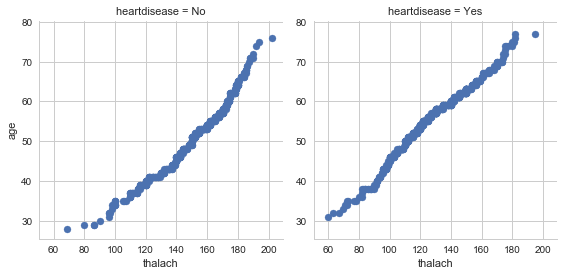

In [30]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(df_total, col="heartdisease", size=4)
g.map(qqplot, "thalach", "age");

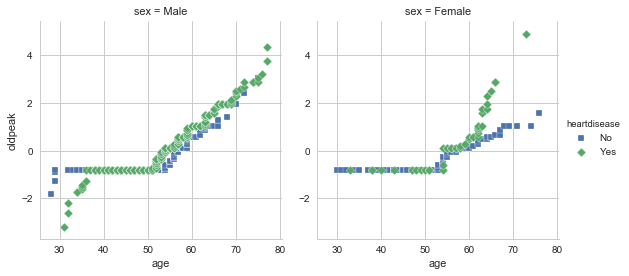

In [32]:
g = sns.FacetGrid(df_total, hue="heartdisease", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "age", "oldpeak", s=40, edgecolor="w")
g.add_legend();

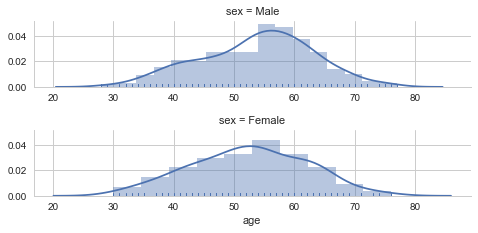

In [33]:
ordered_days = df_total.sex.value_counts().index
g = sns.FacetGrid(df_total, row="sex", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "age", hist=True, rug=True);

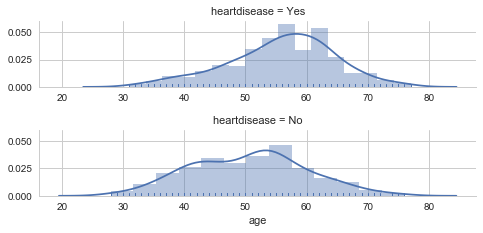

In [34]:
ordered_days = df_total.heartdisease.value_counts().index
g = sns.FacetGrid(df_total, row="heartdisease", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "age", hist=True, rug=True);

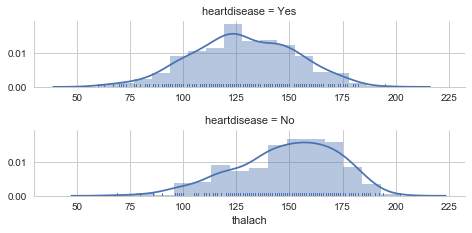

In [35]:
ordered_days = df_total.heartdisease.value_counts().index
g = sns.FacetGrid(df_total, row="heartdisease", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "thalach", hist=True, rug=True);

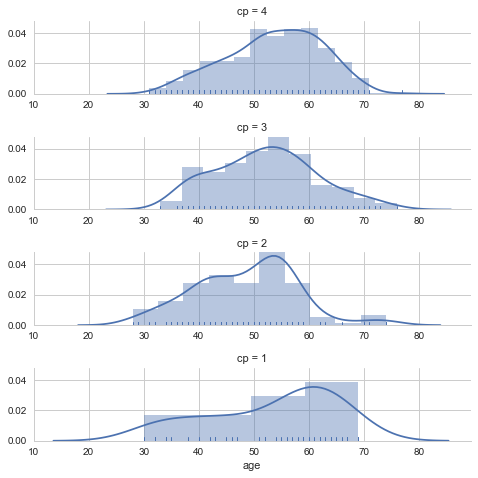

In [161]:
ordered_days = df_total.cp.value_counts().index
g = sns.FacetGrid(df_total, row="cp", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "age", hist=True, rug=True);

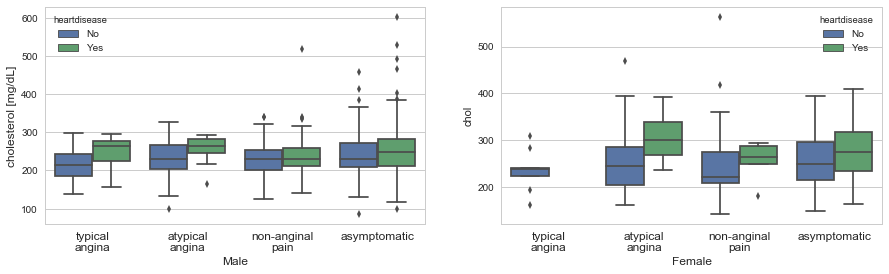

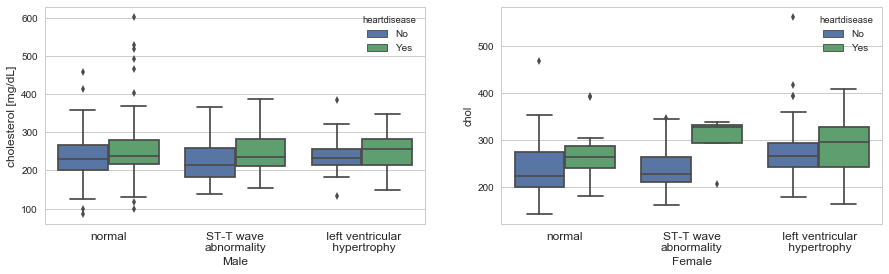

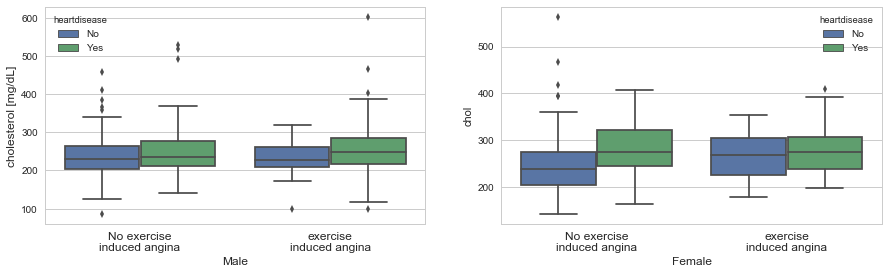

In [36]:

sns.xkcd_rgb["pale red"]





#cholesterol vs chest pain
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x="cp", y="chol", hue = 'heartdisease', data=df_male, ax = ax[0]);
sns.boxplot(x="cp", y="chol", hue = 'heartdisease', data=df_female, ax = ax[1]);
labels_CP = ['typical\nangina', 'atypical\nangina', 'non-anginal\npain','asymptomatic']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_CP, fontsize=12); ax[1].set_xticklabels(labels_CP, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); #ax[1].set_xlabel("cholesterol [mg/dL]", fontsize=12)
plt.show()

#cholesterol vs fasting blood sugar (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x="fbs", y="chol", hue = 'heartdisease', data=df_male, ax = ax[0]);
sns.boxplot(x="fbs", y="chol", hue = 'heartdisease', data=df_female, ax = ax[1]);
ax[0].set_xticklabels([ 'fbs < 120 mg/dl', 'fbs > 120 mg/dl'], fontsize=12)
ax[1].set_xticklabels([ 'fbs < 120 mg/dl', 'fbs > 120 mg/dl'], fontsize=12)
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); #ax[1].set_xlabel("cholesterol [mg/dL]", fontsize=12)
plt.show()

#cholesterol vs restecg (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x="restecg", y="chol", hue = 'heartdisease', data=df_male, ax = ax[0]);
sns.boxplot(x="restecg", y="chol", hue = 'heartdisease', data=df_female, ax = ax[1]);
labels_CP = ['normal', 'ST-T wave\nabnormality',' left ventricular\n hypertrophy']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_CP, fontsize=12); ax[1].set_xticklabels(labels_CP, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); #ax[1].set_xlabel("cholesterol [mg/dL]", fontsize=12)
plt.show()


#cholesterol vs exang (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x="exang", y="chol", hue = 'heartdisease', data=df_male, ax = ax[0]);
sns.boxplot(x="exang", y="chol", hue = 'heartdisease', data=df_female, ax = ax[1]);
labels_CP = [ 'No exercise\ninduced angina','exercise\ninduced angina']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_CP, fontsize=12); ax[1].set_xticklabels(labels_CP, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); #ax[1].set_xlabel("cholesterol [mg/dL]", fontsize=12)
plt.show()

#cholesterol vs exang (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x="slope", y="chol", hue = 'heartdisease', data=df_male, ax = ax[0]);
sns.boxplot(x="slope", y="chol", hue = 'heartdisease', data=df_female, ax = ax[1]);
labels_CP = [ 'upsloping', 'flat','downsloping']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_CP, fontsize=12); ax[1].set_xticklabels(labels_CP, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); #ax[1].set_xlabel("cholesterol [mg/dL]", fontsize=12)
plt.show()



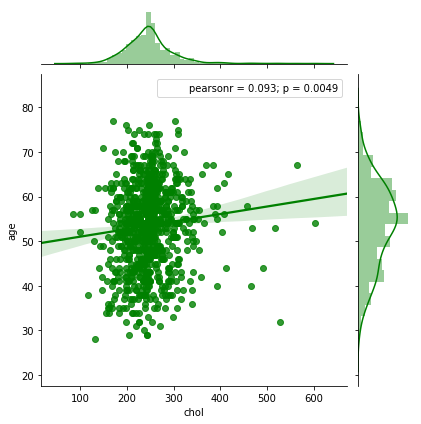

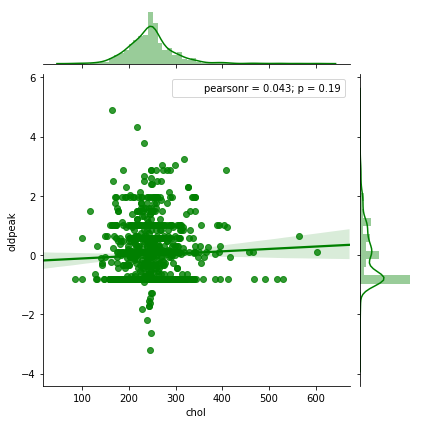

In [4]:
sns.jointplot(data=df_total, x='chol', y='age', kind='reg', color='g');


sns.jointplot(data=df_total, x='chol', y='trestbps', kind='reg', color='g');


sns.jointplot(data=df_total, x='chol', y='thalach', kind='reg', color='g');


sns.jointplot(data=df_total, x='chol', y='oldpeak', kind='reg', color='g');





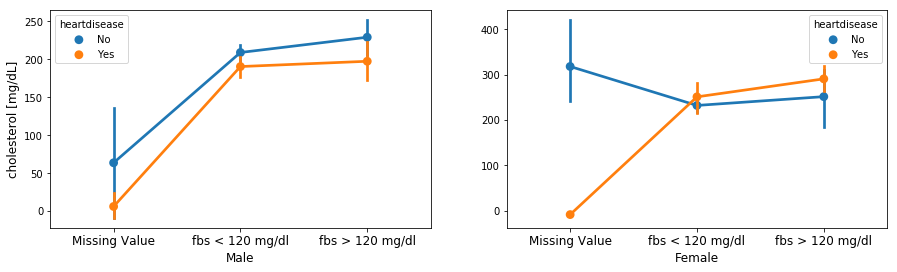

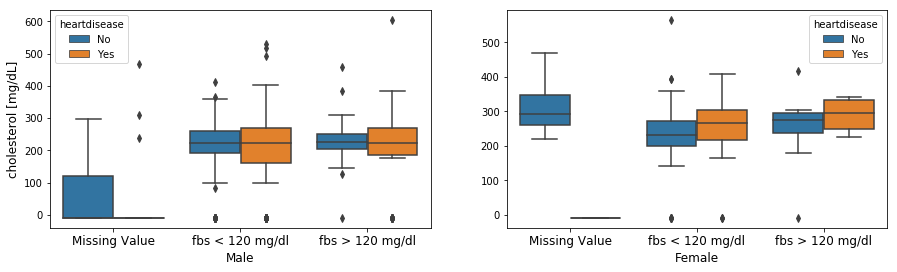

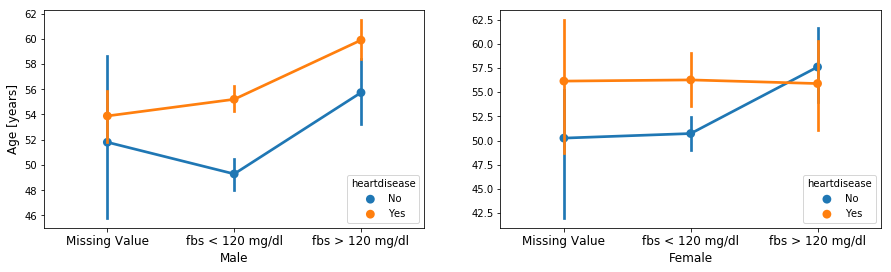

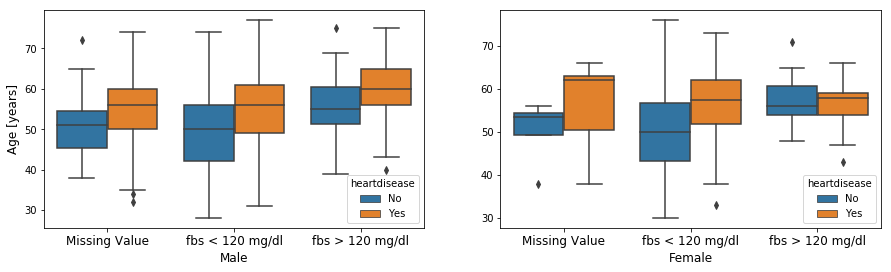

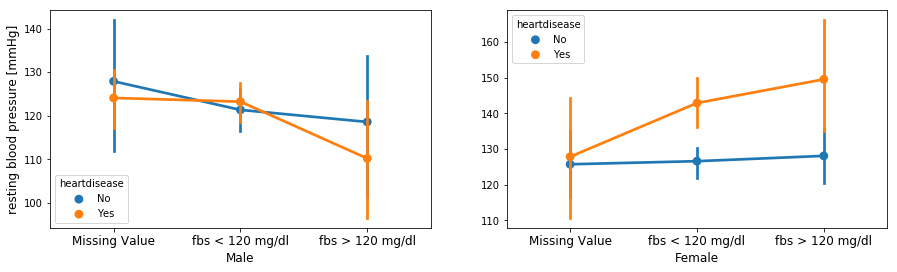

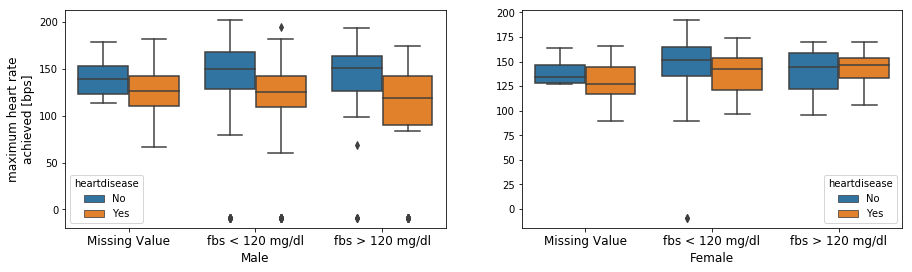

In [118]:
# Numerical vs Categorical --------------------------------

#cholesterol vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.pointplot(y="chol", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.pointplot(y="chol", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#cholesterol vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(y="chol", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.boxplot(y="chol", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("cholesterol [mg/dL]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#age vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.pointplot(y="age", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.pointplot(y="age", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("Age [years]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#age vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(y="age", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.boxplot(y="age", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("Age [years]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()


#trestbps vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.pointplot(y="trestbps", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.pointplot(y="trestbps", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#trestbps vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(y="trestbps", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.boxplot(y="trestbps", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("resting blood pressure [mmHg]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#trestbps vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.pointplot(y="thalach", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.pointplot(y="thalach", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("maximum heart rate\nachieved [bps]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()

#trestbps vs (fbs)
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.boxplot(y="thalach", x="fbs", data=df_male, hue='heartdisease', ax = ax[0]);
sns.boxplot(y="thalach", x="fbs", data=df_female, hue='heartdisease', ax = ax[1]);
labels_x = ['Missing Value', 'fbs < 120 mg/dl', 'fbs > 120 mg/dl']
ax[0].set_xlabel("Male", fontsize=12); ax[1].set_xlabel("Female", fontsize=12)
ax[0].set_xticklabels(labels_x, fontsize=12); ax[1].set_xticklabels(labels_x, fontsize=12)
ax[0].set_ylabel("maximum heart rate\nachieved [bps]", fontsize=12); ax[1].set_ylabel("", fontsize=12)
plt.show()














In [84]:
pd.crosstab([df_total.sex,df_total.heartdisease],[df_total.fbs, df_total.restecg],margins=True).style.background_gradient(cmap='summer_r')

In [85]:
pd.crosstab([df_total.sex,df_total.heartdisease],[df_total.fbs,df_total.cp],margins=True).style.background_gradient(cmap='summer_r')

In [86]:
pd.crosstab([df_total.sex,df_total.heartdisease],[df_total.fbs,df_total.exang],margins=True).style.background_gradient(cmap='summer_r')

In [88]:
pd.crosstab([df_total.sex,df_total.heartdisease],[df_total.fbs,df_total.slope],margins=True).style.background_gradient(cmap='summer_r')

In [110]:
df_male.groupby('cp')['chol'].mean()


cp
1    205.000000
2    214.141593
3    171.152318
4    171.340376
Name: chol, dtype: float64

In [111]:
df_female.groupby('cp')['chol'].mean()

cp
1    210.000000
2    229.540984
3    235.867925
4    234.171429
Name: chol, dtype: float64

In [113]:
df_male.groupby('heartdisease')['chol'].mean()

heartdisease
No     206.254682
Yes    164.145969
Name: chol, dtype: float64

In [114]:
df_female.groupby('heartdisease')['chol'].mean()

heartdisease
No     235.541667
Yes    221.540000
Name: chol, dtype: float64

In [126]:
df_total.groupby(['heartdisease','sex','cp','exang', 'fbs'])['chol'].mean()

heartdisease  sex  cp  exang  fbs
0             0    1    0      0     228.250000
                               1     283.000000
                   2   -9      0     149.500000
                        0     -9     350.666667
                               0     225.355556
                               1     110.500000
                        1      0     242.500000
                               1     293.000000
                   3    0     -9     219.000000
                               0     235.615385
                               1     291.000000
                        1      0     221.666667
                   4    0      0     238.333333
                               1     258.000000
                        1      0     281.555556
              1    1   -9      0     195.500000
                               1     181.000000
                        0      0     215.250000
                               1     255.000000
                        1      0     207.666667
      

In [59]:
from sklearn.cluster import FeatureAgglomeration
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

#filename = 'df_imputed_tot.pkl'
#df_total = pd.read_pickle(filename)

#filename = 'df_imputed_tot_OHE.pkl'
#df_total = pd.read_pickle(filename)

filename = 'df_imputed_vclean.pkl'
df_total = pd.read_pickle(filename)

#filename = 'TotalDataBase.pkl'
#df_total = pd.read_pickle(filename)

#df_total = df_total.drop_duplicates(keep='first')


# Heatmap of feature correlations

#plt.figure(figsize=(10, 8))
correlations = df_total.corr()
#sns.heatmap(correlations, vmax=0.8, square=True)
#plt.show()






def extract_numerical_features(df):
    df = df.copy()
    # Identify numerical columns which are of type object
    numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)

    for feature in df.columns:
        if any(tuple(df[feature].apply(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].apply(lambda x: type(x)) == float)) & \
                (not any(tuple(df[feature].apply(lambda x: type(x)) == str))):
            numerical_features[feature] = 1
    return numerical_features[numerical_features == 1].index

    # Zoom of heatmap with coefficients


'''
plt.figure(figsize=(22, 14))
correlations = df_total[extract_numerical_features(df_total)].corr()
sns.heatmap(correlations, vmax=0.8, square=True)
plt.show()
'''

'''df_sin_target = pd.DataFrame(
    data=df_total[df_total.columns[
        df_total.columns != 'heartdisease']].values, columns=df_total.columns[
        df_total.columns != 'heartdisease'])'''
num_features = extract_numerical_features(df_total)
#num_features = extract_numerical_features(df_sin_target)


df_aglo = pd.DataFrame(data=df_total.values, columns=df_total.columns)


df_total = df_aglo[num_features]
#df_total = df_total[num_features]
plt.figure(figsize=(20, 12))
top_features = 10

correlation_coeff = np.corrcoef(df_total.astype(float).values.T)
sns.set(font_scale=1.20)
coeff_heatmap = sns.heatmap(correlation_coeff, annot=True, cmap='YlGn', cbar=True,
                            square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df_total.columns, xticklabels=df_total.columns)
plt.show()



number_of_clusters=int(df_total.shape[1]/1.2)
# Create Dendrogram
agglomerated_features = FeatureAgglomeration(n_clusters=number_of_clusters)
used_networks = np.arange(0, number_of_clusters, dtype=int)
# used_networks = np.unique(agglomerated_features.labels_)

# In our case all columns are clustered, which means used_columns is true in every element
# used_columns = (df.columns.get_level_values(None)
                # .astype(int)
                # .isin(used_networks))
# used_columns = (agglomerated_feature_labels.astype(int).isin(used_networks))
# df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, df_total.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_total.columns.get_level_values(None)
network_colors = pd.Series(networks, index=df_total.columns).map(network_lut)
sns.set(font="monospace")
# Create custom colormap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
cg = sns.clustermap(df_total.astype(float).corr(), cmap=cmap, linewidths=.5,
                    row_colors=network_colors, col_colors=network_colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()





In [4]:
df_total.info()
df_total.astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
age             920 non-null object
sex             920 non-null object
cp              920 non-null object
trestbps        920 non-null object
chol            920 non-null object
fbs             920 non-null object
restecg         920 non-null object
thalach         920 non-null object
exang           920 non-null object
oldpeak         920 non-null object
slope           920 non-null object
heartdisease    920 non-null object
dtypes: object(12)
memory usage: 86.3+ KB


In [50]:

df_total[df_total.columns] = df_total[df_total.columns].astype(int)
df_total.info()

ValueError: Wrong number of dimensions

In [65]:
df0 = df_total 
fig, axes = plt.subplots( nrows=2, ncols=4, figsize=(20,20) )

plt.suptitle("Heart Disease Data", fontsize=20)


bins = np.linspace(20, 80, 15)
axes[0,0].hist(df0[df0.heartdisease>0].age.tolist(),bins,color=["#FF5959"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df0[df0.heartdisease==0].age,bins,color=["green"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)",fontsize=15)
axes[0,0].set_ylim(0.0,0.080)
axes[0,0].legend(prop={'size': 15},loc="upper left")

bins     = [1,2]
width    = 0.5
heights1 = df0[df0.heartdisease>0]["sex"].groupby(df0["sex"]).count()
heights2 = df0[df0.heartdisease==0]["sex"].groupby(df0["sex"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,1].bar(bins,heights1,width,align="center",edgecolor=["#FF5959"],color=["none"],label="disease")
axes[0,1].bar(bins,heights2,width,align="center",edgecolor=["green"],color=["none"],label="no disease")
axes[0,1].set_xlabel("Sex",fontsize=15)
axes[0,1].set_xticks(bins)
axes[0,1].set_xticklabels(["Female","male"],ha="center")

bins     = np.arange(4)
width    = 0.5
heights1 = df0[df0.heartdisease>0]["cp"].groupby(df0["cp"]).count()
heights2 = df0[df0.heartdisease==0]["cp"].groupby(df0["cp"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["#FF5959"],color=["none"],label="disease")
axes[0,2].bar(bins,heights2,width,align="center",edgecolor=["green"],color=["none"],label="no disease")
axes[0,2].set_xlabel("Type of Chest Pain",fontsize=15)
axes[0,2].set_xticks(bins)
axes[0,2].set_xticklabels(['typical \n angina', 'atypical \n angina', 'non-anginal \n pain','asymptomatic'],
                          ha="right")

bins = np.linspace(80, 200, 15)
axes[0,3].hist(df0[df0.heartdisease>0].trestbps.tolist(),bins,color=["#FF5959"],histtype="step",label="disease",normed=True)
axes[0,3].hist(df0[df0.heartdisease==0].trestbps,bins,color=["green"],histtype="step",label="no disease",normed=True)
axes[0,3].set_xlabel("Resting Blood Pressure (mm Hg)",fontsize=15)


axes[1,0].hist(df0[df0.heartdisease>0].chol.tolist(),color=["#FF5959"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df0[df0.heartdisease==0].chol,color=["green"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("cholesterol (mg/dl)",fontsize=15)





axes[1,1].hist(df0[df0.heartdisease>0].thalach.tolist(),color=["#FF5959"],histtype="step",label="disease",normed=True)
axes[1,1].hist(df0[df0.heartdisease==0].thalach,color=["green"],histtype="step",label="no disease",normed=True)
axes[1,1].set_xlabel("Thalium Test: Max. Heart Rate",fontsize=15)

bins     = np.arange(2)
width    = 0.5
heights1 = df0[df0.heartdisease>0]["exang"].groupby(df0["exang"]).count()
heights2 = df0[df0.heartdisease==0]["exang"].groupby(df0["exang"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[1,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["#FF5959"],color=["none"],label="disease")
axes[1,2].bar(bins,heights2,width,align="center",edgecolor=["green"],color=["none"],label="no disease")
axes[1,2].set_xlabel("Exercise Induced Angina",fontsize=15)
axes[1,2].set_xticks(bins)
axes[1,2].set_xticklabels(["No","Yes"],ha="center")

axes[1,3].hist(df0[df0.heartdisease>0].oldpeak.tolist(),color=["#FF5959"],histtype="step",label="disease",normed=True)
axes[1,3].hist(df0[df0.heartdisease==0].oldpeak,color=["green"],histtype="step",label="no disease",normed=True)
axes[1,3].set_xlabel("ST Depression Induced by Exercise", fontsize=15)



plt.show()

In [58]:
df_total['heartdisease'] = df_total['heartdisease'].apply(lambda x: int(float(x)));


df_total['heartdisease'] = pd.to_numeric(df_total['heartdisease'])
df_total['cp'] = pd.to_numeric(df_total['cp'])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 12 columns):
age             919 non-null float64
sex             919 non-null float64
cp              919 non-null int64
trestbps        919 non-null float64
chol            919 non-null float64
fbs             919 non-null float64
restecg         919 non-null float64
thalach         919 non-null float64
exang           919 non-null float64
oldpeak         919 non-null float64
slope           919 non-null float64
heartdisease    919 non-null int64
dtypes: float64(10), int64(2)
memory usage: 133.3 KB
